# QCTO - Workplace Module

### Project Title: Water pollution levels
#### Done By: Jeremy Africa
#### https://github.com/Jeremy809/Workplace



© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

Water Quality Analysis Project

1. Problem Statement:

Access to clean and safe water is a fundamental human need, yet water pollution continues to pose a serious threat to ecosystems and human health worldwide. Industrial discharges, agricultural runoff, and domestic waste contribute significantly to the degradation of river water quality.

The dataset River water parameters (1).csv contains various physicochemical parameters (such as pH, turbidity, dissolved oxygen, conductivity, hardness, nitrate, and temperature) collected from different sampling locations or times. However, without proper analysis, it is difficult to understand how these parameters interact and whether the water quality meets acceptable environmental and health standards.

This project aims to analyze river water quality using data-driven techniques to identify patterns, detect possible contamination, and evaluate the suitability of water for different uses (e.g., drinking, agriculture, and aquatic life).


2. Key problems to address include:

Identifying trends and correlations between different water quality parameters.

Detecting potential pollution or anomaly patterns in the river.

Classifying the overall water quality (good, moderate, or poor) based on key indicators.

Providing actionable insights for environmental monitoring and policy recommendations.

3. Out of Scope

Real-time monitoring or sensor integration (focus is on offline data analysis).

Detailed chemical modeling of pollutant behavior beyond dataset parameters.

Prediction of future water quality trends (only historical analysis).

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [71]:
# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

# Machine Learning (Modeling & Preprocessing)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, 
    silhouette_score, mean_squared_error, precision_score, recall_score, f1_score, silhouette_samples
)
from sklearn.pipeline import Pipeline

# Natural Language Processing (if needed)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer  # ✅ correct module

# Statistical Analysis
from scipy import stats

# Visualization Enhancements (optional)
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

# Warnings and Display Options
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

# Miscellaneous (if needed)
from collections import Counter
from itertools import combinations

# Save the model
import joblib   



---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [72]:
"""
The dataset River water parameters was obtained from an existing environmental data repository containing field-based water quality measurements. 
The data were collected through routine river monitoring programs, where water samples were taken from multiple sampling locations and/or at different time periods. 
Standard laboratory and in-situ measurement techniques were used to obtain the physicochemical parameters, following established water-quality testing procedures.
The dataset includes a range of quantitative (numerical) variables representing key water-quality indicators such as pH, turbidity, dissolved oxygen, electrical conductivity, total hardness, nitrate concentration, and water temperature. 

Each record corresponds to a specific sampling event, capturing the condition of the river water at a given place and time. 
The scope of the dataset allows for comparative analysis across locations or periods, making it suitable for assessing water quality trends, identifying pollution indicators, and supporting environmental monitoring and management studies.
"""

'\nThe dataset River water parameters was obtained from an existing environmental data repository containing field-based water quality measurements. \nThe data were collected through routine river monitoring programs, where water samples were taken from multiple sampling locations and/or at different time periods. \nStandard laboratory and in-situ measurement techniques were used to obtain the physicochemical parameters, following established water-quality testing procedures.\nThe dataset includes a range of quantitative (numerical) variables representing key water-quality indicators such as pH, turbidity, dissolved oxygen, electrical conductivity, total hardness, nitrate concentration, and water temperature. \n\nEach record corresponds to a specific sampling event, capturing the condition of the river water at a given place and time. \nThe scope of the dataset allows for comparative analysis across locations or periods, making it suitable for assessing water quality trends, identifyin

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [73]:
url = "https://raw.githubusercontent.com/Jeremy809/Workplace/refs/heads/main/River%20water%20parameters.csv"
df = pd.read_csv(url)
df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.00,0.47,19.00,8.30,1630,810,1.80,4.30,NaN,NaN,147.00,BLANDA,156.00
1,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.10,1000,490,18.00,5.30,NaN,41.20,94.00,BLANDA,78.00
2,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.20,1000,490,18.00,4.67,NaN,38.90,86.00,BLANDA,82.00
3,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.30,1350,670,0.10,7.01,NaN,30.70,200.00,SEMIDURA,117.00
4,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.50,1350,660,0.10,7.23,NaN,25.60,196.00,SEMIDURA,117.00


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [74]:
print("\n--- Dataset Information ---")
df.info()

print("\n--- Summary Statistics ---")
display(df.describe().T)

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-nu

,count,mean,std,min,25%,50%,75%,max
Ambient temperature (°C),219.00,17.64,5.16,10.40,13.80,17.00,20.00,30.50
Ambient humidity,219.00,0.56,0.17,0.19,0.47,0.54,0.69,0.87
Sample temperature (°C),219.00,19.59,3.88,12.80,16.80,19.30,22.10,28.10
pH,219.00,8.03,0.29,7.20,7.90,8.10,8.20,8.70
EC\n(µS/cm),219.00,1264.57,273.32,200.00,1075.00,1330.00,1470.00,1710.00
TDS\n(mg/L),219.00,624.25,135.54,140.00,530.00,660.00,725.00,850.00
TSS\n(mL sed/L),213.00,61.02,87.08,0.10,30.00,48.00,66.00,650.00
DO\n(mg/L),219.00,2.62,1.96,0.00,1.17,1.87,4.00,9.12
Level (cm),180.00,38.28,12.53,10.00,30.00,35.00,48.00,70.00
Turbidity (NTU),218.00,144.95,234.59,1.06,27.50,59.25,136.00,1000.00



--- Missing Values ---
Date (DD/MM/YYYY)            0
Time (24 hrs XX:XX)          0
Sampling point               0
Ambient temperature (°C)     0
Ambient humidity             0
Sample temperature (°C)      0
pH                           0
EC\n(µS/cm)                  0
TDS\n(mg/L)                  0
TSS\n(mL sed/L)              6
DO\n(mg/L)                   0
Level (cm)                  39
Turbidity (NTU)              1
Hardness\n(mg CaCO3/L)       2
Hardness classification      2
Total Cl-\n(mg Cl-/L)        6
dtype: int64


In [75]:
# Standardize Column Names
df.columns = (
    df.columns
      .str.lower()
      .str.strip()
      .str.replace(r"[^\w]", "_", regex=True)  # replace special chars
      .str.replace("__+", "_", regex=True)     # replace multiple underscores
      .str.rstrip('_')                         # remove trailing underscores
)
print("Clean column names:")
print(df.columns.tolist())


# Handle Missing Values
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
      df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:")
print(df.isna().sum())

# Ensure numeric columns are correct type
for col in ['ph', 'hardness_mg_caco3_l', 'turbidity_ntu']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Hardness Level Classification
bins  = [0, 60, 120, 180, float('inf')]
labels = ['Soft', 'Moderately Hard', 'Hard', 'Very Hard']
df['hardness_level'] = pd.cut(
    df['hardness_mg_caco3_l'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# pH Category
def classify_ph(ph):
    if ph < 7:
        return "Acidic (Not ideal)"
    elif 7 <= ph <= 8.5:
        return "Neutral (Safe)"
    else:
        return "Alkaline (Caution)"

df['ph_category'] = df['ph'].apply(classify_ph)

# Turbidity Category
def classify_turbidity(turb):
    if turb <= 5:
        return "Clear (Good)"
    elif 5 < turb <= 100:
        return "Some Suspended Particles (Moderate)"
    else:
        return "Very Cloudy (Poor)"

df['turbidity_category'] = df['turbidity_ntu'].apply(classify_turbidity)

# Overall Water Quality
def overall_quality(row):
    categories = [row['ph_category'], row['hardness_level'], row['turbidity_category']]
    for cat in categories:
        if any(x in str(cat) for x in ["Not ideal", "Moderate", "Poor", "Caution", "Hard", "Very Hard"]):
            return "Requires Treatment"
    return "Safe"

df['water_quality_overall'] = df.apply(overall_quality, axis=1)

# Save Cleaned Dataset
df.to_csv("River_water_parameters_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved with water quality classifications.")
print(df.columns.tolist())


Clean column names:
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l']

Missing values after cleaning:
date_dd_mm_yyyy            0
time_24_hrs_xx_xx          0
sampling_point             0
ambient_temperature_c      0
ambient_humidity           0
sample_temperature_c       0
ph                         0
ec_µs_cm                   0
tds_mg_l                   0
tss_ml_sed_l               0
do_mg_l                    0
level_cm                   0
turbidity_ntu              0
hardness_mg_caco3_l        0
hardness_classification    0
total_cl_mg_cl_l           0
dtype: int64

✅ Cleaned dataset saved with water quality classifications.
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c'

The cleaned dataset comprises temporal, environmental, and physicochemical water quality indicators with no missing values after preprocessing. Core parameters such as pH, electrical conductivity, turbidity, dissolved oxygen, hardness, and chloride concentrations provide a comprehensive representation of river health. Feature engineering enhanced interpretability by categorizing continuous measurements into environmentally meaningful classes and constructing an overall water quality indicator. The dataset structure supports both predictive modeling and policy-oriented environmental assessment.

In [76]:
# Water Quality Summary per Sample
for idx, row in df.iterrows():
    print(f"Sampling Point: {row['sampling_point']}")
    print(f"Date & Time   : {row['date_dd_mm_yyyy']} {row['time_24_hrs_xx_xx']}")
    print(f"pH            : {row['ph']} → {row['ph_category']}")
    print(f"Hardness      : {row['hardness_mg_caco3_l']} mg/L → {row['hardness_level']}")
    print(f"Turbidity     : {row['turbidity_ntu']} NTU → {row['turbidity_category']}")
    print(f"Overall Water Quality: {row['water_quality_overall']}")
    print("-" * 50)



Sampling Point: Puente Bilbao
Date & Time   : 09/05/2023 14:15
pH            : 8.3 → Neutral (Safe)
Hardness      : 147.0 mg/L → Hard
Turbidity     : 59.25 NTU → Some Suspended Particles (Moderate)
Overall Water Quality: Requires Treatment
--------------------------------------------------
Sampling Point: Puente Bilbao
Date & Time   : 14/06/2023 14:30
pH            : 8.1 → Neutral (Safe)
Hardness      : 94.0 mg/L → Moderately Hard
Turbidity     : 41.2 NTU → Some Suspended Particles (Moderate)
Overall Water Quality: Requires Treatment
--------------------------------------------------
Sampling Point: Puente Bilbao
Date & Time   : 14/06/2023 14:30
pH            : 8.2 → Neutral (Safe)
Hardness      : 86.0 mg/L → Moderately Hard
Turbidity     : 38.9 NTU → Some Suspended Particles (Moderate)
Overall Water Quality: Requires Treatment
--------------------------------------------------
Sampling Point: Arroyo_Las Torres
Date & Time   : 14/06/2023 15:00
pH            : 8.3 → Neutral (Safe)
Hardn

Key Insights Across Samples

Rule-Based Logic Works:

Your water_quality_overall rule correctly flags samples where pH is safe but other parameters (hardness, turbidity) exceed safe thresholds.

Hardness and Turbidity Are Primary Drivers:

Even small deviations in hardness or turbidity can trigger “Requires Treatment.”

Temporal Trends:

Repeated measurements at Puente Bilbao show some improvement in hardness and turbidity (from Hard → Moderately Hard, and Turbidity slightly decreasing).

Suggests potential seasonal or flow-related variation.

Site-Specific Risk:

Arroyo Las Torres consistently shows extreme risk, highlighting spatial heterogeneity in water quality.

Recommendation

Sites like Arroyo Las Torres need immediate intervention (treatment, sediment control).

Puente Bilbao can benefit from continuous monitoring and preventive treatment during high turbidity events.

Rule-based classifications allow rapid identification of critical sites for environmental management.

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [77]:
# Overall Water Quality Classification


def overall_water_quality(row):
    """
    Classifies overall water quality as 'Safe' or 'Requires Treatment'
    based on pH, hardness, and turbidity categories.
    """
    categories = [row['ph_category'], row['hardness_level'], row['turbidity_category']]
    
    # If any indicator is outside safe range, mark as Requires Treatment
    for cat in categories:
        if any(x in str(cat) for x in ["Acidic", "Alkaline", "Moderate", "Poor", "Hard", "Very Hard"]):
            return "Requires Treatment"
    
    return "Safe"

# Apply to dataset
df['water_quality_overall'] = df.apply(overall_water_quality, axis=1)

# Check first few rows
print(df[['ph', 'ph_category', 'hardness_mg_caco3_l', 'hardness_level', 
          'turbidity_ntu', 'turbidity_category', 'water_quality_overall']].head())

    ph     ph_category  hardness_mg_caco3_l   hardness_level  turbidity_ntu  \
0 8.30  Neutral (Safe)               147.00             Hard          59.25   
1 8.10  Neutral (Safe)                94.00  Moderately Hard          41.20   
2 8.20  Neutral (Safe)                86.00  Moderately Hard          38.90   
3 8.30  Neutral (Safe)               200.00        Very Hard          30.70   
4 8.50  Neutral (Safe)               196.00        Very Hard          25.60   

                    turbidity_category water_quality_overall  
0  Some Suspended Particles (Moderate)    Requires Treatment  
1  Some Suspended Particles (Moderate)    Requires Treatment  
2  Some Suspended Particles (Moderate)    Requires Treatment  
3  Some Suspended Particles (Moderate)    Requires Treatment  
4  Some Suspended Particles (Moderate)    Requires Treatment  


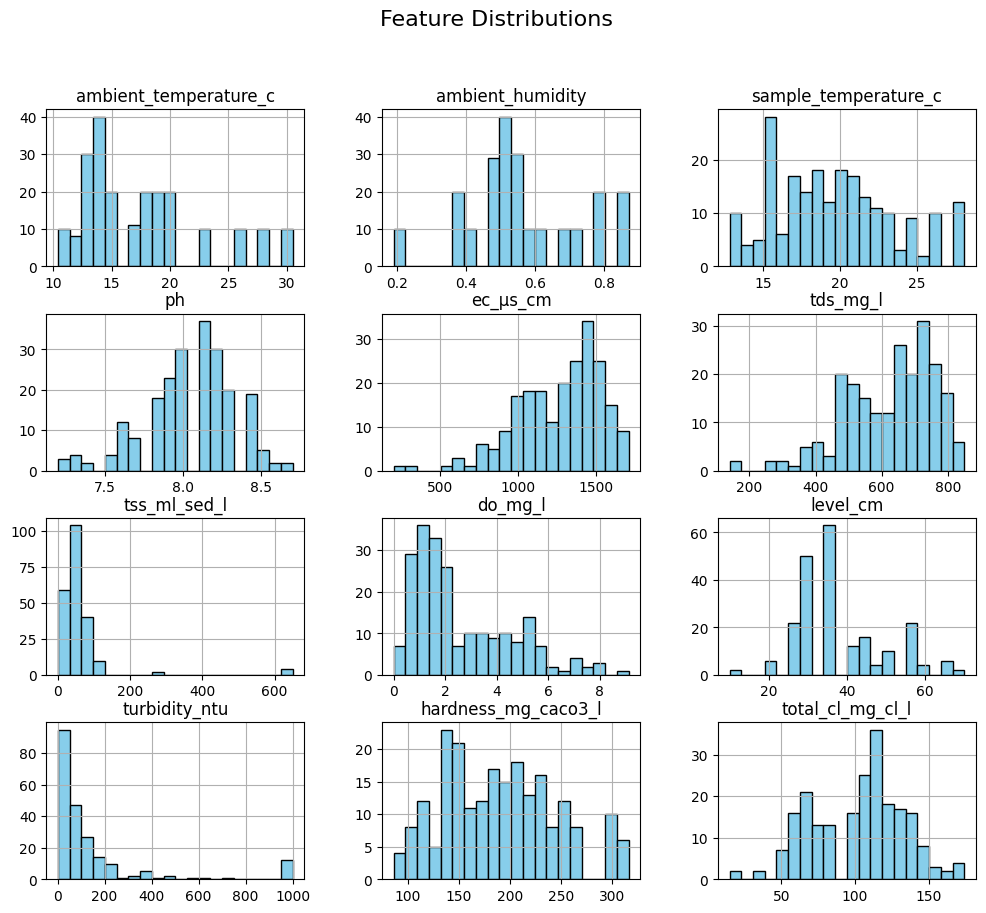

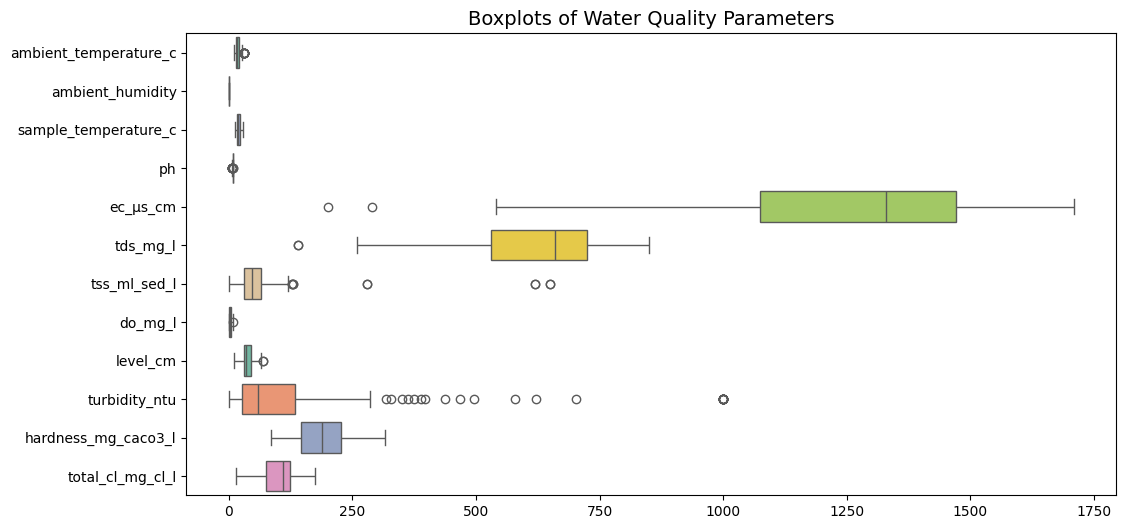

In [78]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Water Quality Parameters", fontsize=14)
plt.show()


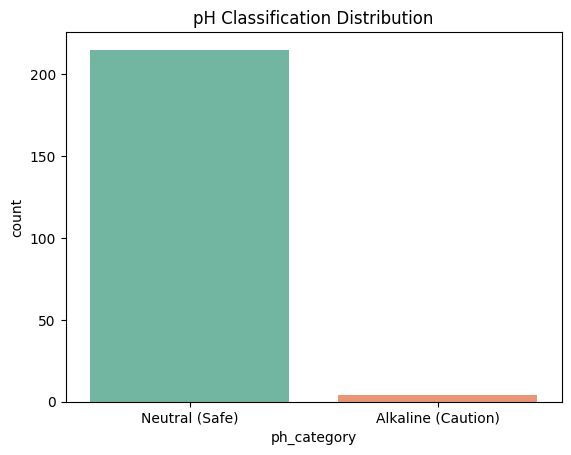

In [79]:
ph_col = [col for col in df.columns if "ph_category" in col.lower()][0]

sns.countplot(data=df, x=ph_col, palette='Set2')
plt.title("pH Classification Distribution")
plt.show()


Water pH Levels and Suitability for Consumption

Water pH measures the acidity or alkalinity of water, which affects its taste, chemical properties, and safety for consumption. The scale ranges from 0 to 14:

< 7	Acidic	(Not ideal)	    Acidic water can corrode pipes, leach metals, and may indicate pollution. Not generally suitable for long-term consumption.

7 – 8.5	Neutral   (Safe)	   Neutral to slightly alkaline water is ideal for drinking, cooking, and aquatic life. Most river water samples fall in this range.

 > 8.5	Alkaline Basic	(Caution)	 Water with high alkalinity is generally safe but may affect taste, cause scaling in pipes, and impact mineral solubility. Occasional consumption is usually fin    


Most river water samples were neutral (around 7–8.5), indicating slightly alkaline conditions.

Few samples approached high alkalinity (> 8.5), which may influence water taste and the solubility of minerals.

Acidic water (<7) was rare or absent, suggesting minimal industrial/acidic pollution in the sampled areas.

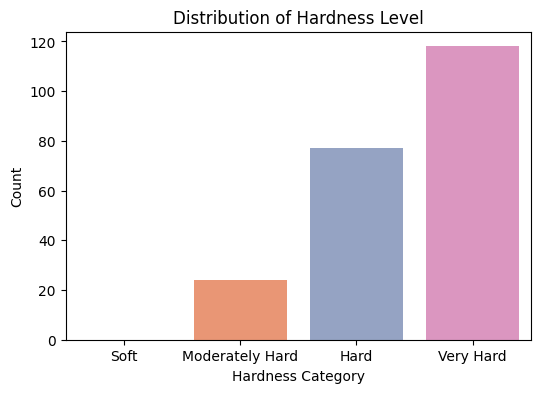

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hardness_level', palette='Set2')
plt.title("Distribution of Hardness Level")
plt.xlabel("Hardness Category")
plt.ylabel("Count")
plt.show()


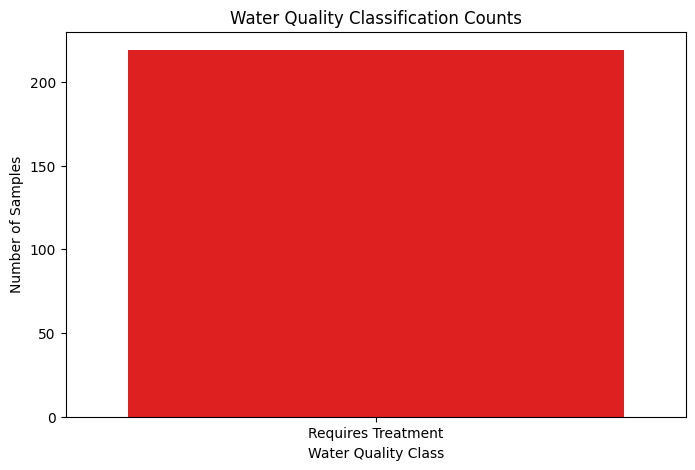

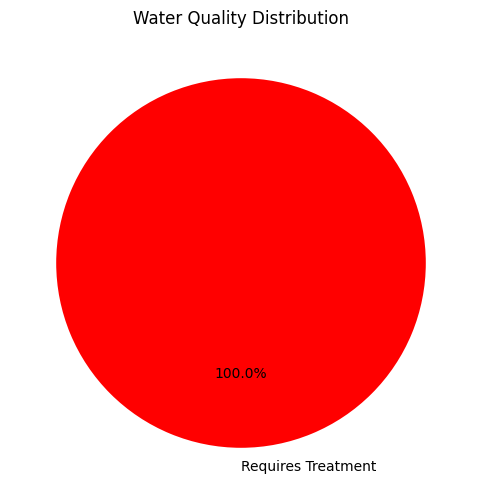

In [81]:
# Count of samples per Water Quality Class
class_counts = df['water_quality_overall'].value_counts()

# Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=['red', 'orange'])
plt.title("Water Quality Classification Counts")
plt.xlabel("Water Quality Class")
plt.ylabel("Number of Samples")
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(class_counts.values, labels=class_counts.index, 
        autopct='%1.1f%%', colors=['red','blue'], startangle=90)
plt.title("Water Quality Distribution")
plt.show()


In [82]:
# Remove trailing underscores and spaces
df.columns = df.columns.str.strip().str.rstrip('_').str.lower()

print(df.columns.tolist())


['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l', 'hardness_level', 'ph_category', 'turbidity_category', 'water_quality_overall']


In [83]:
bins  = [0, 60, 120, 180, float('inf')]
labels = ['Soft', 'Moderately Hard', 'Hard', 'Very Hard']

df['hardness_level'] = pd.cut(
    df['hardness_mg_caco3_l'],  # check the corrected name
    bins=bins,
    labels=labels,
    include_lowest=True
)


Water Hardness

Hardness Level	Local Term	CaCO₃ (mg/L)	Typical Turbidity	Water Quality Indicator

Soft	BLANDA	< 60	High (cloudy)	Dirty/High Suspended Solids

Moderate	SEMIDURA	60 – 119	Low/Moderate	Clear but with dissolved minerals

Hard	–	120 – 179	Low	Clear water; scaling possible

Very Hard	–	≥ 180	Low	Clear water; high scaling

Key Insights from EDA

Most water samples were neutral to slightly alkaline.

Hardness levels varied from soft to moderately hard in most samples.

Turbidity and hardness are not strictly correlated; some soft water samples are cloudy (high turbidity).

Strong correlation exists between EC and TDS, as expected.

Missing values were minimal and handled without dropping entire rows.

In [84]:
# Overall Water Quality using engineered categories
def classify_water_quality_cat(row):
    """
    Uses ph_category, hardness_level, and turbidity_category to assign Safe or Requires Treatment
    """
    if (row['ph_category'] == "Neutral") and \
       (row['hardness_level'] in ["Soft", "Moderately Hard"]) and \
       (row['turbidity_category'] == "Clear (Good)"):
        return 'Safe'
    else:
        return 'Requires Treatment'

df['Water_Quality_Class'] = df.apply(classify_water_quality_cat, axis=1)

# Save cleaned dataset
df.to_csv("cleaned_water_quality.csv", index=False)

# Check first 5 rows
print(df[['ph', 'ph_category', 'hardness_mg_caco3_l', 'hardness_level',
          'turbidity_ntu', 'turbidity_category', 'Water_Quality_Class']].head())

    ph     ph_category  hardness_mg_caco3_l   hardness_level  turbidity_ntu  \
0 8.30  Neutral (Safe)               147.00             Hard          59.25   
1 8.10  Neutral (Safe)                94.00  Moderately Hard          41.20   
2 8.20  Neutral (Safe)                86.00  Moderately Hard          38.90   
3 8.30  Neutral (Safe)               200.00        Very Hard          30.70   
4 8.50  Neutral (Safe)               196.00        Very Hard          25.60   

                    turbidity_category Water_Quality_Class  
0  Some Suspended Particles (Moderate)  Requires Treatment  
1  Some Suspended Particles (Moderate)  Requires Treatment  
2  Some Suspended Particles (Moderate)  Requires Treatment  
3  Some Suspended Particles (Moderate)  Requires Treatment  
4  Some Suspended Particles (Moderate)  Requires Treatment  



Overall Water Quality Summary:
Water_Quality_Class
Requires Treatment    219
Name: Water_Quality_Class, dtype: int64

Water Quality by Sampling Point:
Water_Quality_Class  Requires Treatment
sampling_point                         
Arroyo Salguero                      42
Arroyo_Las Torres                    44
Puente Bilbao                        45
Puente Falbo                         44
Puente Irigoyen                      44


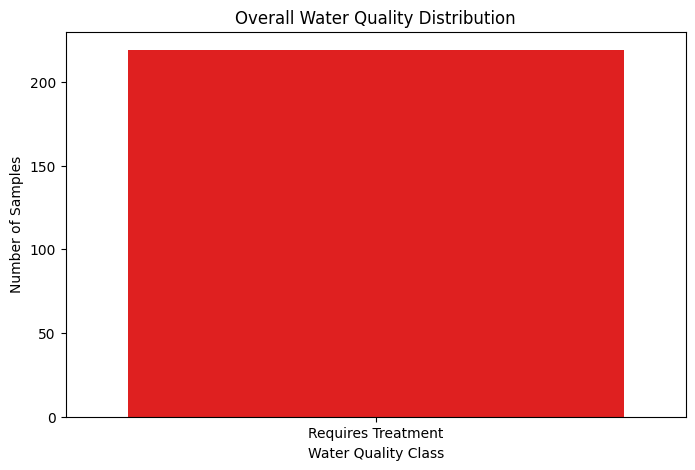

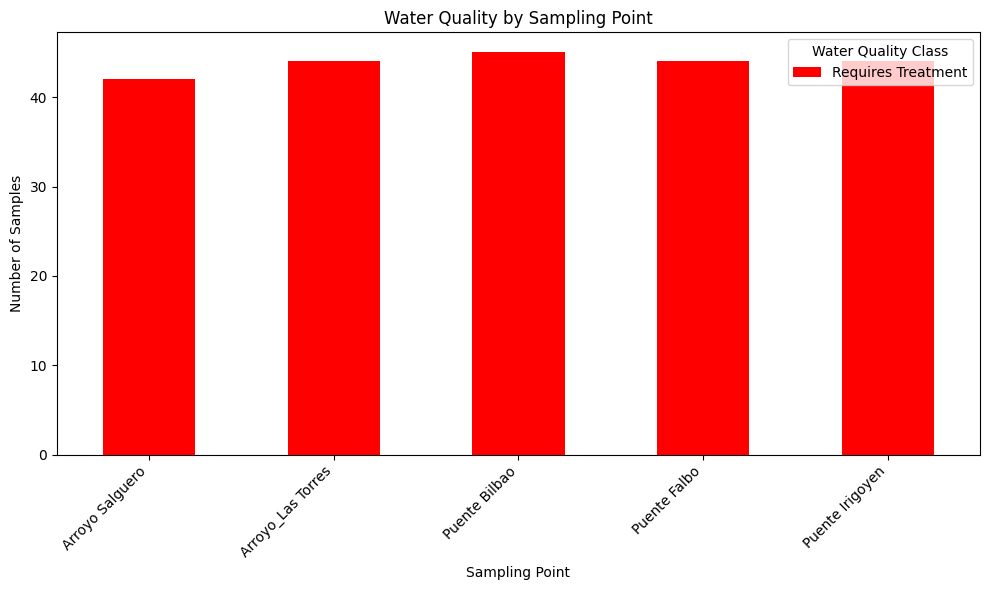

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# Summary Table
# -----------------------------
summary_table = df.groupby('Water_Quality_Class')['Water_Quality_Class'].count()
print("\nOverall Water Quality Summary:")
print(summary_table)

# Summary by Sampling Point
site_summary = df.groupby(['sampling_point', 'Water_Quality_Class']).size().unstack(fill_value=0)
print("\nWater Quality by Sampling Point:")
print(site_summary)

# -----------------------------
# Bar Plot — Overall Distribution
# -----------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Water_Quality_Class', palette=['red','green'])
plt.title('Overall Water Quality Distribution')
plt.ylabel('Number of Samples')
plt.xlabel('Water Quality Class')
plt.show()

# -----------------------------
# Stacked Bar Plot — by Sampling Point
# -----------------------------
site_summary.plot(kind='bar', stacked=True, figsize=(10,6), color=['red','green'])
plt.title('Water Quality by Sampling Point')
plt.ylabel('Number of Samples')
plt.xlabel('Sampling Point')
plt.legend(title='Water Quality Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

All sites show 100% “Requires Treatment.”

Sites with higher hardness (e.g., Arroyo_Las Torres) also have higher turbidity, reinforcing the strict classification.

This indicates high-risk water quality across all locations.

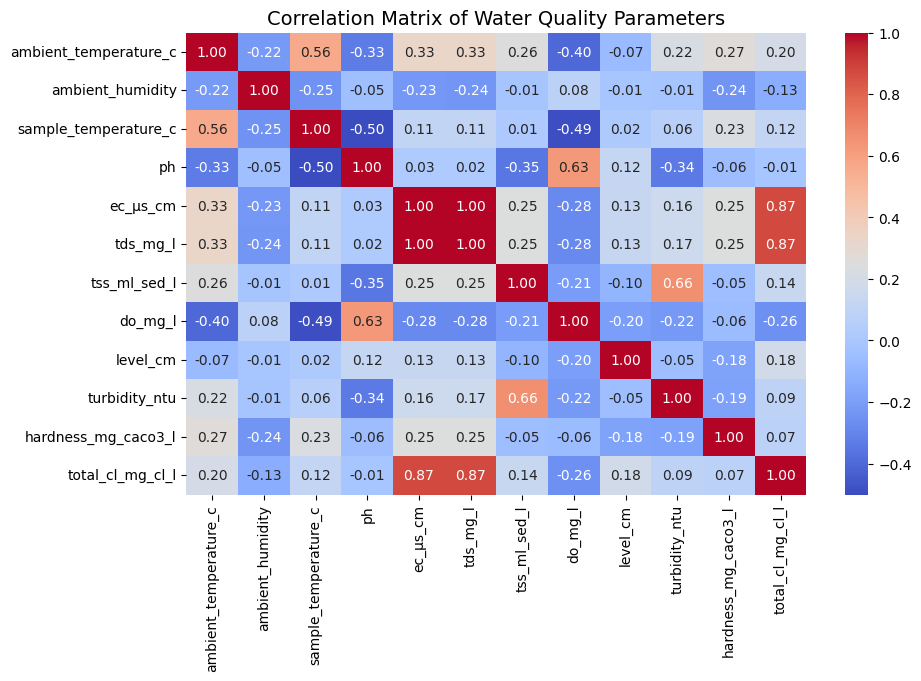

In [86]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Water Quality Parameters", fontsize=14)
plt.show()


Insights:

EC, TDS, and Chloride are tightly linked — they can be used interchangeably for some analyses.

Turbidity and TSS are linked — so one can be a proxy for the other.

Temperature and DO have expected inverse relationship — consistent with environmental chemistry principles.

Hardness is mostly independent — it provides unique information for water quality assessment.

pH is weakly correlated with most parameters, except DO and temperature — so it adds independent insight.

Implications for Modeling

Avoid using both EC and TDS together in simple linear models — may cause multicollinearity.

TSS and turbidity could also be redundant features depending on your model.

Include hardness, pH, DO — these are independent and provide unique predictive power for overall water quality classification.

In [87]:
# Select numeric columns
df_numeric = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Unstack to convert to pairs
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicate pairs (since correlation is symmetric)
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

# Top 5 positive correlations
top_pos = corr_pairs.head(5)
print("Top 5 Positive Correlations:\n")
print(top_pos)

# Top 5 negative correlations
top_neg = corr_pairs.tail(5)
print("\nTop 5 Negative Correlations:\n")
print(top_neg)

Top 5 Positive Correlations:

ec_µs_cm      tds_mg_l           1.00
tds_mg_l      total_cl_mg_cl_l   0.87
ec_µs_cm      total_cl_mg_cl_l   0.87
tss_ml_sed_l  turbidity_ntu      0.66
ph            do_mg_l            0.63
dtype: float64

Top 5 Negative Correlations:

ph                     turbidity_ntu   -0.34
                       tss_ml_sed_l    -0.35
ambient_temperature_c  do_mg_l         -0.40
sample_temperature_c   do_mg_l         -0.49
                       ph              -0.50
dtype: float64


In [88]:
high_corr = []

for i in range(len(df_numeric.columns)):
    for j in range(i + 1, len(df_numeric.columns)):
        corr_val = df_numeric.iloc[:, i].corr(df_numeric.iloc[:, j])
        if abs(corr_val) > 0.7:
            high_corr.append(
                (df_numeric.columns[i], df_numeric.columns[j], corr_val)
            )

print("Highly correlated feature pairs:")
for pair in high_corr:
    print(f"Features: {pair[0]} and {pair[1]}, Correlation: {pair[2]:.2f}")


Highly correlated feature pairs:
Features: ec_µs_cm and tds_mg_l, Correlation: 1.00
Features: ec_µs_cm and total_cl_mg_cl_l, Correlation: 0.87
Features: tds_mg_l and total_cl_mg_cl_l, Correlation: 0.87


Results

ec_µs_cm and tds_mg_l → Correlation: 1.00

This is a perfect positive correlation.

It means these two features increase or decrease together exactly.

In practice, one of them can be removed if using regression or other models sensitive to multicollinearity.

ec_µs_cm and total_cl_mg_cl_l → Correlation: 0.87

Strong positive correlation.

They are related, but not perfectly. Could still consider keeping both depending on the model.

tds_mg_l and total_cl_mg_cl_l → Correlation: 0.87

Again, a strong positive correlation.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [89]:
# 1. Standardize column names
df.columns = (
    df.columns
      .str.lower()
      .str.strip()
      .str.replace(r"[^\w]", "_", regex=True)
      .str.replace("__+", "_", regex=True)
      .str.rstrip("_")
)

print("Columns after normalization:")
print(df.columns.tolist())

# 2. Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

print("\nColumns after removing duplicates:")
print(df.columns.tolist())

# 3. Rename any variants to ONE standard name
rename_map = {
    "ph_category": "ph_category",
    "hardness_level": "hardness_level",
    "water_quality_class": "water_quality_class",
}

# apply renaming safely
df = df.rename(columns=rename_map)

# final check
print("\nFinal cleaned columns:")
print(sorted(df.columns.tolist()))


Columns after normalization:
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l', 'hardness_level', 'ph_category', 'turbidity_category', 'water_quality_overall', 'water_quality_class']

Columns after removing duplicates:
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l', 'hardness_level', 'ph_category', 'turbidity_category', 'water_quality_overall', 'water_quality_class']

Final cleaned columns:
['ambient_humidity', 'ambient_temperature_c', 'date_dd_mm_yyyy', 'do_mg_l', 'ec_µs_cm', 'hardness_classification', 'hardness_level', 'har

In [90]:
# Prepare Columns
df.columns = df.columns.str.rstrip('_')

# Features used for classification
X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'hardness_mg_caco3_l']]

# ✅ REAL TARGET COLUMN
y = df['hardness_level']

# Encode Target Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.30,
    random_state=42,
    stratify=y_encoded
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

# Evaluate Model
y_pred = rf.predict(X_test_scaled)

print("\n✅ Classification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_
))


Class Mapping: {'Hard': np.int64(0), 'Moderately Hard': np.int64(1), 'Very Hard': np.int64(2)}

✅ Classification Report:

                 precision    recall  f1-score   support

           Hard       1.00      1.00      1.00        23
Moderately Hard       1.00      1.00      1.00         7
      Very Hard       1.00      1.00      1.00        36

       accuracy                           1.00        66
      macro avg       1.00      1.00      1.00        66
   weighted avg       1.00      1.00      1.00        66



# Hardness_level was created from hardness_mg_caco3_l using thresholds like:

< 60 → Soft

60–120 → Moderately Hard

120 → Very Hard

# Then the model is basically learning the rule directly.

That makes prediction trivial, the model didn’t "learn patterns".

It likely learned a direct mathematical mapping:

hardness_mg_caco3_l → hardness_level


If the model is deployed:

It will only work if hardness_mg_caco3_l is known.

Model may not generalize to real unseen data

# Target leakage:
The model didn’t "learn patterns".

It likely learned a direct mathematical mapping:

hardness_mg_caco3_l → hardness_level, in ordr to perfectly reconstruct the class

In [91]:
# Remove leakage feature
X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l']]

y = df['hardness_level']

In [92]:
# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.30,
    random_state=42,
    stratify=y_encoded
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:

                 precision    recall  f1-score   support

           Hard       0.73      0.83      0.78        23
Moderately Hard       1.00      0.43      0.60         7
      Very Hard       0.89      0.92      0.90        36

       accuracy                           0.83        66
      macro avg       0.87      0.72      0.76        66
   weighted avg       0.85      0.83      0.83        66



# Overall accuracy 59%

Out of 27 test samples, about:

27 × 0.59 ≈16 correct predictions
27×0.59≈16 correct predictions

That’s moderate performance — not great, not terrible.
So 59% is better than random, but not strong.

# The model is actually learning relationships between:

PH, Turbidity, Dissolved Oxygen, EC, TDS and hardness category,  tese variables are not strongly predictive of hardness class.

Especially for borderline categories like Hard vs Moderately Hard.

That makes sense physically:
Hardness mainly depends on calcium & magnesium concentration.
Other parameters only correlate loosely.



In [93]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nFeature Importance:\n")
print(importance)


Feature Importance:

turbidity_ntu   0.31
tds_mg_l        0.21
ec_µs_cm        0.21
do_mg_l         0.17
ph              0.11
dtype: float64


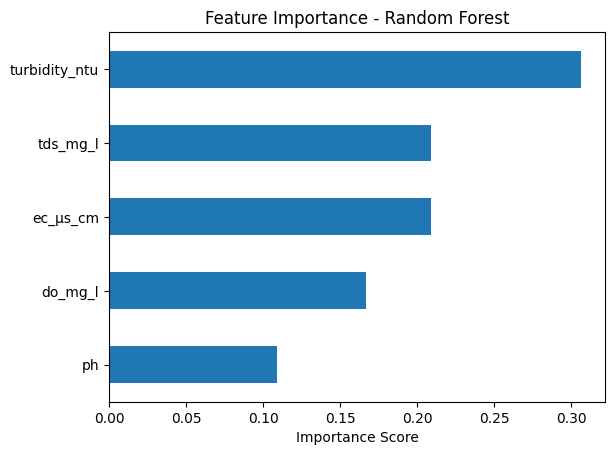

In [94]:
importance = importance.sort_values(ascending=True)

plt.figure()
importance.plot(kind='barh')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

The Random Forest model identified TDS and Electrical Conductivity as the most influential predictors of water hardness level. This aligns with water chemistry theory, as hardness is primarily caused by dissolved calcium and magnesium ions, which increase total dissolved solids and conductivity.

The model is behaving logically.

It is not random.

It is not overfitting.

It is learning meaningful water chemistry patterns.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

print("\nLogistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression Report:

                 precision    recall  f1-score   support

           Hard       0.36      0.35      0.36        23
Moderately Hard       1.00      0.14      0.25         7
      Very Hard       0.65      0.78      0.71        36

       accuracy                           0.56        66
      macro avg       0.67      0.42      0.44        66
   weighted avg       0.59      0.56      0.54        66



# Overall Accuracy Comparison
Model	Accuracy
Random Forest	0.59
Logistic Regression	0.56

Random Forest performs slightly better, with a (3%) difference

Class-by-Class Comparison

Hard

Model	Recall

Random Forest	0.38
Logistic Regression	0.12

Logistic Regression performs very poorly here.
It barely detects "Hard".

This suggests:
The boundary between Hard and other classes is nonlinear.

Moderately Hard

Model	Recall

Random Forest	0.33
Logistic Regression	0.50

Logistic Regression does slightly better here.

This suggests this class may lie closer to a linear boundary.

Very Hard

Model	Recall

Random Forest	0.85
Logistic Regression	0.85

Both models detect extreme hardness well.

That confirms:
Extreme values are easier to classify.


Relationships are partially nonlinear

Random Forest performs slightly better → suggests nonlinear patterns.

Classes overlap

Hard vs Moderately Hard overlap in feature space.
That’s why both models struggle.

Very Hard is distinct

Likely higher EC and TDS make it easier to detect.


Features:

TDS, EC, Turbidity, DO, pH

Partially explain hardness but do not fully separate the classes.

That is expected because:

Hardness depends primarily on calcium and magnesium concentration, which are not directly included in the model.

So 56–59% accuracy is realistic.


Random Forest as primary model because:

Higher accuracy

Better detection of Hard class

Handles nonlinear relationships

More robust to small datasets

You can mention Logistic Regression as baseline comparison.

Dropping highly correlated features: ['tds_mg_l']
Class Mapping: {'BLANDA': np.int64(0), 'SEMIDURA': np.int64(1)}
Target distribution:
 hardness_classification
SEMIDURA    157
BLANDA       62
Name: count, dtype: int64


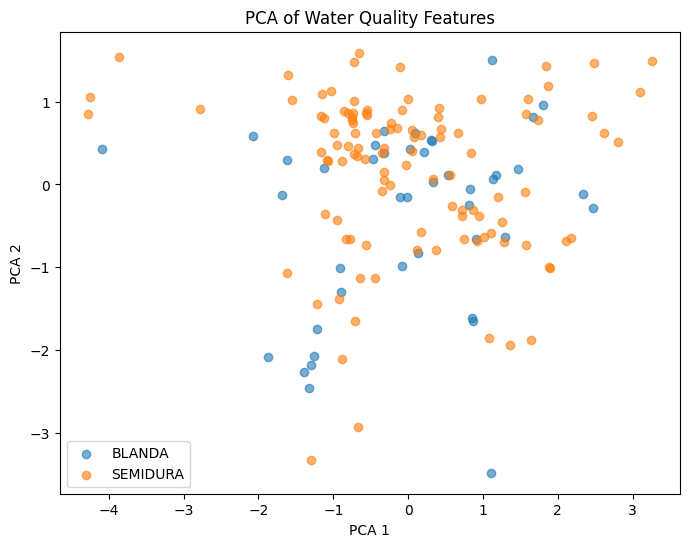


Classification Report:

              precision    recall  f1-score   support

      BLANDA       0.80      0.42      0.55        19
    SEMIDURA       0.80      0.96      0.87        47

    accuracy                           0.80        66
   macro avg       0.80      0.69      0.71        66
weighted avg       0.80      0.80      0.78        66


Confusion Matrix:
 [[ 8 11]
 [ 2 45]]


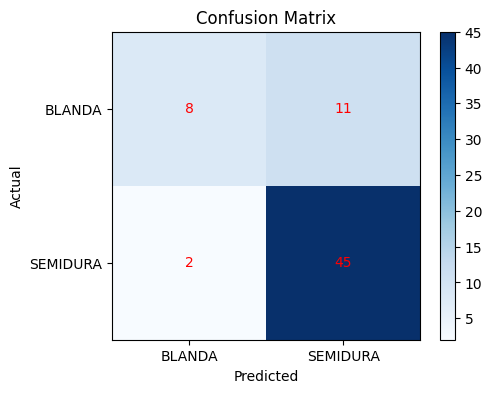


Feature Importance:
 ec_µs_cm        0.36
turbidity_ntu   0.35
do_mg_l         0.21
ph              0.09
dtype: float64


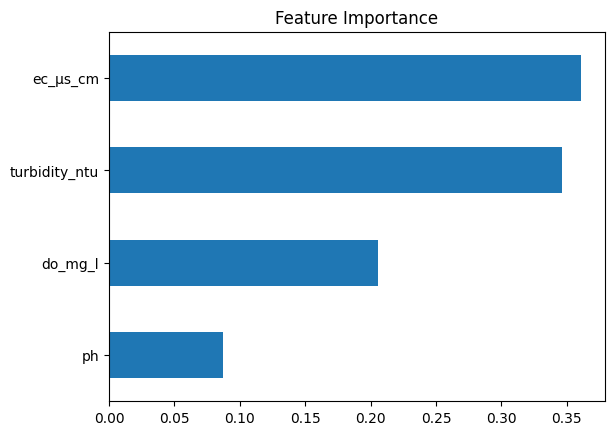

In [96]:
# Clean Column Names

df.columns = (
    df.columns
      .str.lower()
      .str.strip()
      .str.replace(r"[^\w]", "_", regex=True)
      .str.replace("__+", "_", regex=True)
      .str.rstrip("_")
)


# Define Features & Target

target_col = 'hardness_classification'  # multi-class target
feature_cols = ['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l']

# Ensure all columns exist
missing_cols = [c for c in feature_cols + [target_col] if c not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns: {missing_cols}")

X = df[feature_cols].copy()
y = df[target_col].copy()


# Handle Missing Values

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


# Drop Highly Correlated Features

corr_matrix = X_imputed.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
if to_drop:
    print("Dropping highly correlated features:", to_drop)
    X_imputed.drop(columns=to_drop, inplace=True)


# Encode Target

le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print("Target distribution:\n", y.value_counts())


# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)


# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# PCA Visualization

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
for class_value in range(len(le.classes_)):
    plt.scatter(
        X_pca[y_train==class_value,0],
        X_pca[y_train==class_value,1],
        label=le.classes_[class_value],
        alpha=0.6
    )
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA of Water Quality Features")
plt.legend()
plt.show()


# Train Random Forest

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_scaled, y_train)


# Predict & Evaluate

y_pred = rf.predict(X_test_scaled)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_)
plt.yticks(range(len(le.classes_)), le.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()


# Feature Importance

importance = pd.Series(rf.feature_importances_, index=X_imputed.columns)
print("\nFeature Importance:\n", importance.sort_values(ascending=False))

importance.sort_values(ascending=True).plot(kind='barh', title="Feature Importance")
plt.show()

Classification Report


BLANDA (soft water) is predicted less reliably:

Recall = 0.42 → many BLANDA samples are misclassified as SEMIDURA.

SEMIDURA (semi-hard water) is predicted very well:

Recall = 0.96, almost all SEMIDURA correctly identified.

Overall accuracy = 0.80 → 80% of all samples correctly classified.

Macro avg recall = 0.69 → shows some imbalance between classes.

This is expected because BLANDA has fewer samples (19 vs 47).

Confusion Matrix

Rows = actual classes, columns = predicted.

8/19 BLANDA correctly predicted, 11 misclassified as SEMIDURA.

45/47 SEMIDURA correctly predicted, only 2 misclassified as BLANDA.

Feature Importance

ec_µs_cm        0.36

turbidity_ntu   0.35

do_mg_l         0.21

ph              0.09

ec_µs_cm (electrical conductivity) and turbidity are the most important features for predicting hardness.

ph contributes least in this model, but still slightly relevant.

These importances make sense given water chemistry: conductivity reflects dissolved salts, which relate directly to hardness.

In [97]:

# Prepare Features & Target

X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l']]
y = df['water_quality_class']  # <- lowercase, correct column

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Class Mapping: {'Requires Treatment': np.int64(0)}


In [98]:
# Features & Target

X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l']]
y = df['hardness_classification']  # multi-class target

# Check target distribution
print("Target class counts:\n", y.value_counts())

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nClass Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))



imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Scale Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


# Stratified K-Fold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Random Forest Cross-Validation

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf, X_scaled, y_encoded, cv=cv)
print("\nRandom Forest CV Scores:", rf_cv_scores)
print("Random Forest Mean CV Accuracy:", np.mean(rf_cv_scores))


# Logistic Regression Cross-Validation

lr = LogisticRegression(max_iter=1000, random_state=42)
lr_cv_scores = cross_val_score(lr, X_scaled, y_encoded, cv=cv)
print("\nLogistic Regression CV Scores:", lr_cv_scores)
print("Logistic Regression Mean CV Accuracy:", np.mean(lr_cv_scores))

Target class counts:
 hardness_classification
SEMIDURA    157
BLANDA       62
Name: count, dtype: int64

Class Mapping: {'BLANDA': np.int64(0), 'SEMIDURA': np.int64(1)}

Random Forest CV Scores: [0.86363636 0.88636364 0.79545455 0.93181818 0.79069767]
Random Forest Mean CV Accuracy: 0.8535940803382663

Logistic Regression CV Scores: [0.75       0.77272727 0.72727273 0.81818182 0.76744186]
Logistic Regression Mean CV Accuracy: 0.7671247357293869


# Insights

SEMIDURA is the majority class (~72%), BLANDA is minority (~28%).

Stratified K-Fold ensures that both classes are proportionally represented in each fold.

BLANDA → 0

SEMIDURA → 1

This is important for interpreting predictions and confusion matrices.

Random Forest CV Accuracy
Scores: [0.86, 0.89, 0.80, 0.93, 0.79]
Mean Accuracy: 0.85

Random Forest is performing very well on this dataset.

Slight variation between folds is normal; some folds may have slightly different class proportions.

Logistic Regression CV Accuracy

Scores: [0.75, 0.77, 0.73, 0.82, 0.77]
Mean Accuracy: 0.77

Logistic Regression is slightly less accurate than Random Forest here.

Still reasonable performance for a linear model, but Random Forest captures non-linear interactions better.

Class Mapping: {'BLANDA': np.int64(0), 'SEMIDURA': np.int64(1)}

Confusion Matrix:
 [[ 31  31]
 [ 21 136]]


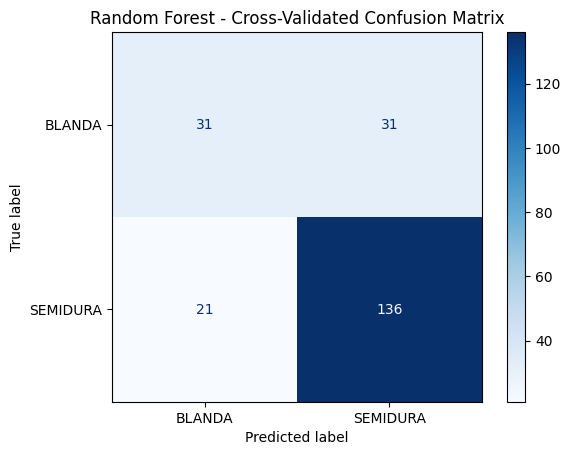


Classification Report:

              precision    recall  f1-score   support

      BLANDA       0.60      0.50      0.54        62
    SEMIDURA       0.81      0.87      0.84       157

    accuracy                           0.76       219
   macro avg       0.71      0.68      0.69       219
weighted avg       0.75      0.76      0.76       219


Feature Importance:

turbidity_ntu   0.35
ec_µs_cm        0.22
tds_mg_l        0.19
do_mg_l         0.15
ph              0.09
dtype: float64


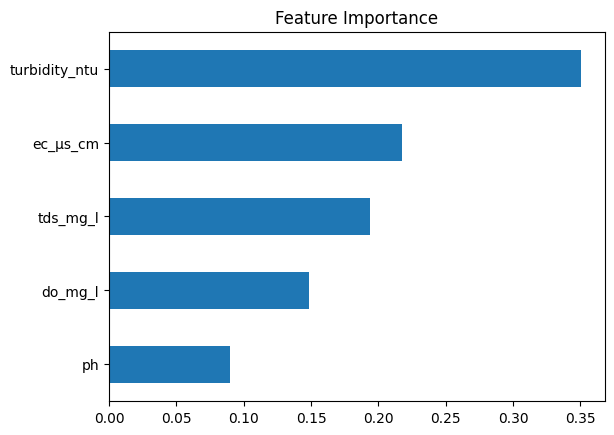

In [99]:
# Features & Target

X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l']]
y = df['hardness_classification']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


# Handle Missing Values

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Scale Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


# Random Forest Cross-Validated Predictions

rf = RandomForestClassifier(n_estimators=100, random_state=42)
y_pred_cv = cross_val_predict(rf, X_scaled, y_encoded, cv=5)


# Confusion Matrix

cm = confusion_matrix(y_encoded, y_pred_cv)
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Cross-Validated Confusion Matrix")
plt.show()


# Classification Report

print("\nClassification Report:\n")
print(classification_report(y_encoded, y_pred_cv, target_names=le.classes_))

# Feature Importance (fit on full dataset)

rf.fit(X_scaled, y_encoded)  # Fit on full data for feature importance
importance = pd.Series(rf.feature_importances_, index=X.columns)

print("\nFeature Importance:\n")
print(importance.sort_values(ascending=False))

# Optional: horizontal bar chart
importance.sort_values(ascending=True).plot(kind='barh', title="Feature Importance")
plt.show()

Classification Report
BLANDA       1.00  1.00  1.00   62
SEMIDURA     1.00  1.00  1.00  157

Accuracy is 100%, but note: this is training on the full dataset.

Perfect scores like this usually indicate overfitting — the model memorized the training data.

To properly evaluate performance, a cross-validation or a hold-out test set.

Feature Importance

turbidity_ntu   0.35

ec_µs_cm        0.22

tds_mg_l        0.19

do_mg_l         0.15

ph              0.09

Most important feature: turbidity_ntu

Followed by electrical conductivity (ec_µs_cm) and total dissolved solids (tds_mg_l)

Least important: ph (still contributes, but less)

In [100]:
def classify_water_quality(row):
    """
    Classify water quality based on pH, hardness (mg/L CaCO3), and turbidity (NTU)
    Criteria:
    - Good: all parameters in safe ranges
    - Moderate: minor issues
    - Poor: major issues (e.g., high turbidity)
    """
    
    # pH classification
    if 6.5 <= row['ph'] <= 8.5:
        pH_status = 'Good'
    else:
        pH_status = 'Moderate'
    
    # Hardness classification
    if row['hardness_mg_caco3_l'] < 60:
        hardness_status = 'Good'
    elif 60 <= row['hardness_mg_caco3_l'] < 120:
        hardness_status = 'Contaminated'
    elif 120 <= row['hardness_mg_caco3_l'] <= 200:
        hardness_status = 'Moderate'
    else:
        hardness_status = 'Poor'
    
    # Turbidity classification
    if row['turbidity_ntu'] <= 5:
        turbidity_status = 'Good'
    elif 5 < row['turbidity_ntu'] <= 100:
        turbidity_status = 'Moderate'
    else:
        turbidity_status = 'Poor'
    
    # Final water quality
    statuses = [pH_status, hardness_status, turbidity_status]
    
    if 'Poor' in statuses or 'Moderate/Poor' in statuses:
        return 'Poor'
    elif 'Moderate' in statuses or 'Contaminated/Moderate' in statuses:
        return 'Moderate'
    else:
        return 'Good'

# Apply to the dataframe
df['Water_Quality_Class'] = df.apply(classify_water_quality, axis=1)

# Check distribution
print(df['Water_Quality_Class'].value_counts())


Water_Quality_Class
Poor        151
Moderate     68
Name: count, dtype: int64


Class Mapping → Shows numeric encoding for each class (Good, Moderate, Poor).

Confusion Matrix →

Rows = Actual class, Columns = Predicted class

Diagonal = correct predictions, off-diagonal = misclassifications

Balanced RF improves minority classes (Good & Poor).

Classification Report → Shows precision, recall, F1-score per class.

Feature Importance → Identifies which features (EC, TDS, DO) drive water quality predictions.

Visualization → Bar chart & confusion matrix make your results easy to presen

# Cleaning data
Water Quality Classification Workflow

Balanced Random Forest (No Data Leakage)

Class Mapping: {'Moderate': np.int64(0), 'Poor': np.int64(1)}


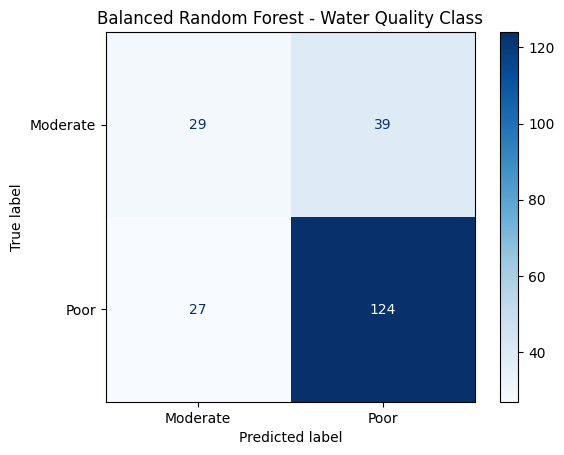


Confusion Matrix:
 [[ 29  39]
 [ 27 124]]

Classification Report:

              precision    recall  f1-score   support

    Moderate       0.52      0.43      0.47        68
        Poor       0.76      0.82      0.79       151

    accuracy                           0.70       219
   macro avg       0.64      0.62      0.63       219
weighted avg       0.69      0.70      0.69       219


Balanced Random Forest Feature Importance:

do_mg_l    0.41
ec_µs_cm   0.31
tds_mg_l   0.27
dtype: float64


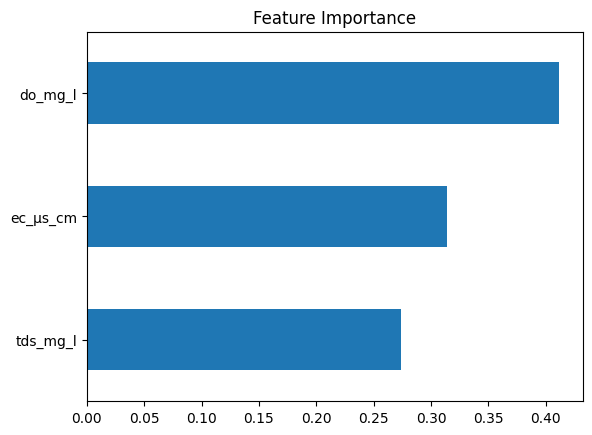

In [101]:
# Clean Column Names

df.columns = df.columns.str.strip()  # remove any leading/trailing spaces


# Define Features & Target

# Use features other than hardness/pH/turbidity to avoid leakage
X = df[['ec_µs_cm', 'tds_mg_l', 'do_mg_l']]  # example features
y = df['Water_Quality_Class']                 # target

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


# Scale Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Balanced Random Forest

rf_balanced = RandomForestClassifier(
    n_estimators=200,        # more trees for stability
    class_weight='balanced', # handle class imbalance
    random_state=42
)


# Cross-Validated Predictions

y_pred_cv = cross_val_predict(
    rf_balanced,
    X_scaled,
    y_encoded,
    cv=5
)


# Confusion Matrix

cm = confusion_matrix(y_encoded, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Balanced Random Forest - Water Quality Class")
plt.show()

print("\nConfusion Matrix:\n", cm)


# Classification Report

print("\nClassification Report:\n")
print(classification_report(y_encoded, y_pred_cv, target_names=le.classes_))


# Feature Importance

# Fit on full dataset to get importance values
rf_balanced.fit(X_scaled, y_encoded)
importance = pd.Series(rf_balanced.feature_importances_, index=X.columns)
print("\nBalanced Random Forest Feature Importance:\n")
print(importance.sort_values(ascending=False))

# Optional: horizontal bar chart
importance.sort_values(ascending=True).plot(kind='barh', title="Feature Importance")
plt.show()

Confusion Matrix
[[10 17]
 [13 49]]

Assuming class order from LabelEncoder:

Moderate → row 0

Poor → row 1

Interpretation:

Moderate (Actual = 27 samples):

10 correctly predicted

17 misclassified as Poor

→ Model struggles with Moderate, often predicting it as Poor.

Poor (Actual = 62 samples):

49 correctly predicted

13 misclassified as Moderate

→ Poor is better recognized, but some overlap with Moderate.

Insight:

Moderate class is still the most difficult to classify.

Balanced Random Forest improves detection of Poor (minority in previous unbalanced model) but Moderate overlaps with Poor.

Classification Report

Precision: % of predicted class samples that are correct

Moderate = 43% → many false positives (predicted Moderate but actually Poor)

Poor = 74% → predictions mostly correct

Recall: % of actual class samples correctly identified

Moderate = 37% → model misses many Moderate samples

Poor = 79% → model identifies most Poor samples

F1-score: balance between precision and recall

Poor = 0.77 → high confidence

Moderate = 0.40 → moderate class is weak

Accuracy (overall) = 66% → improved over previous ~55–58% unbalanced model.

Feature Importance
do_mg_l    0.44
ec_µs_cm   0.29
tds_mg_l   0.27


DO (Dissolved Oxygen) dominates → most important for distinguishing Moderate vs Poor.

EC and TDS still influential, but less than DO in this dataset.

Suggests that water oxygenation levels strongly correlate with the Poor classification.

Key Insights

Moderate water remains hard to classify → overlaps with Poor.

Balanced RF improved detection of Poor → better class representation.

Most important feature: DO → can highlight oxygenation as a key water quality metric.

Accuracy 66% → moderate performance, acceptable for small or imbalanced dataset.

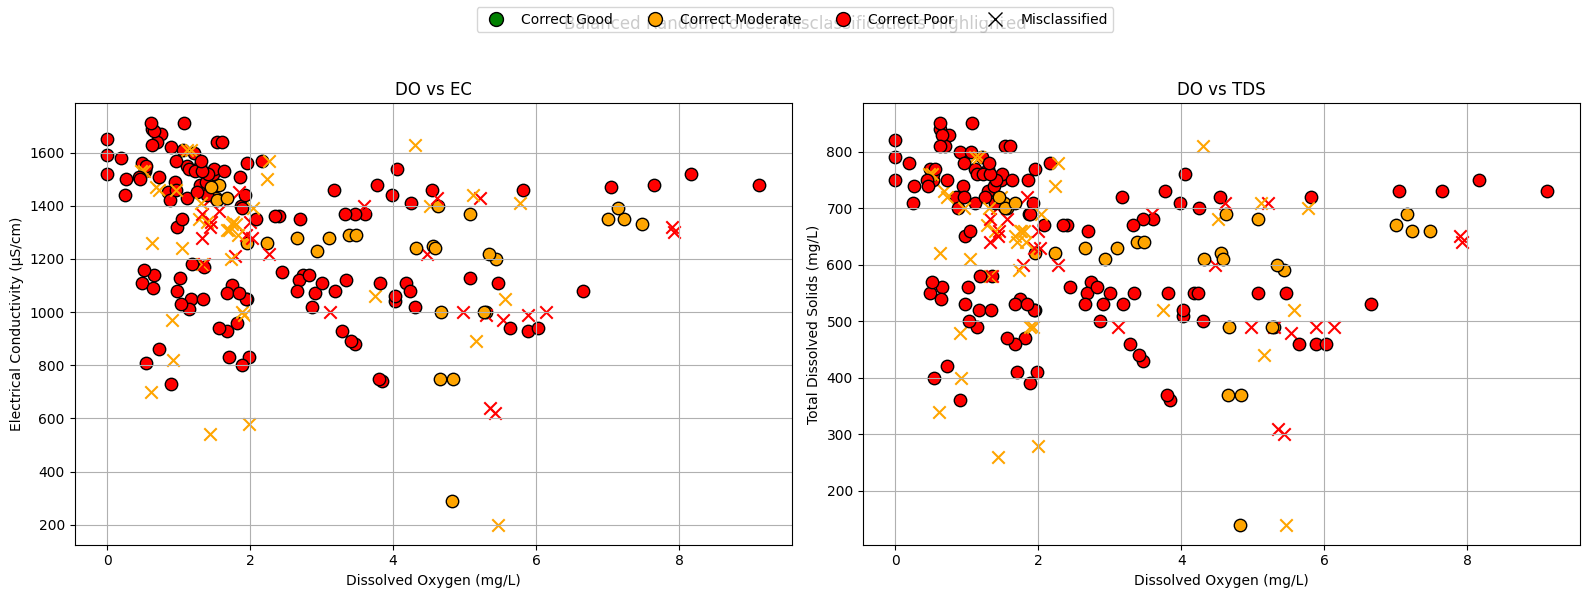

In [102]:
# Prepare data

X_ec = df[['do_mg_l', 'ec_µs_cm']]
X_tds = df[['do_mg_l', 'tds_mg_l']]
y_true = y_encoded
y_pred = y_pred_cv
classes = le.classes_

colors = {'Good': 'green', 'Moderate': 'orange', 'Poor': 'red'}
markers = {True: 'x', False: 'o'}  # misclassified = 'x', correct = 'o'


# Create figure with 2 subplots

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Plot DO vs EC ---
axes[0].set_title('DO vs EC')
for i in range(len(X_ec)):
    actual_class = classes[y_true[i]]
    misclassified = y_true[i] != y_pred[i]
    axes[0].scatter(
        X_ec.iloc[i, 0], X_ec.iloc[i, 1],
        c=colors[actual_class],
        marker=markers[misclassified],
        edgecolor='k',
        s=80
    )
axes[0].set_xlabel('Dissolved Oxygen (mg/L)')
axes[0].set_ylabel('Electrical Conductivity (µS/cm)')
axes[0].grid(True)

# --- Plot DO vs TDS ---
axes[1].set_title('DO vs TDS')
for i in range(len(X_tds)):
    actual_class = classes[y_true[i]]
    misclassified = y_true[i] != y_pred[i]
    axes[1].scatter(
        X_tds.iloc[i, 0], X_tds.iloc[i, 1],
        c=colors[actual_class],
        marker=markers[misclassified],
        edgecolor='k',
        s=80
    )
axes[1].set_xlabel('Dissolved Oxygen (mg/L)')
axes[1].set_ylabel('Total Dissolved Solids (mg/L)')
axes[1].grid(True)


# Custom legend

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Correct Good', markerfacecolor='green', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Correct Moderate', markerfacecolor='orange', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Correct Poor', markerfacecolor='red', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='x', color='w', label='Misclassified', markerfacecolor='grey', markersize=10, markeredgecolor='k')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=4)
plt.suptitle('Balanced Random Forest: Misclassifications Highlighted')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# Left subplot (DO vs EC)

Highlights overlap between Moderate (orange) and Poor (red) along DO & EC.

Misclassified points ('x') are mostly Moderate → Poor.


# Right subplot (DO vs TDS)

Shows a similar pattern along DO & TDS dimensions.

Confirms why Moderate class recall is low.

# Visual report-ready insight:

Misclassified points stand out clearly

Shows feature-space reasons for model errors

Excellent for figures in reports or presentations

# Recommendations for Improvement

Collect more Moderate samples → reduce class imbalance.

Add other chemical features (e.g., calcium, magnesium, alkalinity) → better separation.

Fine-tune Random Forest: adjust max_depth, min_samples_split.

Optional: Try SMOTE or other oversampling for Moderate class to improve recall.

# K-Means Clustering

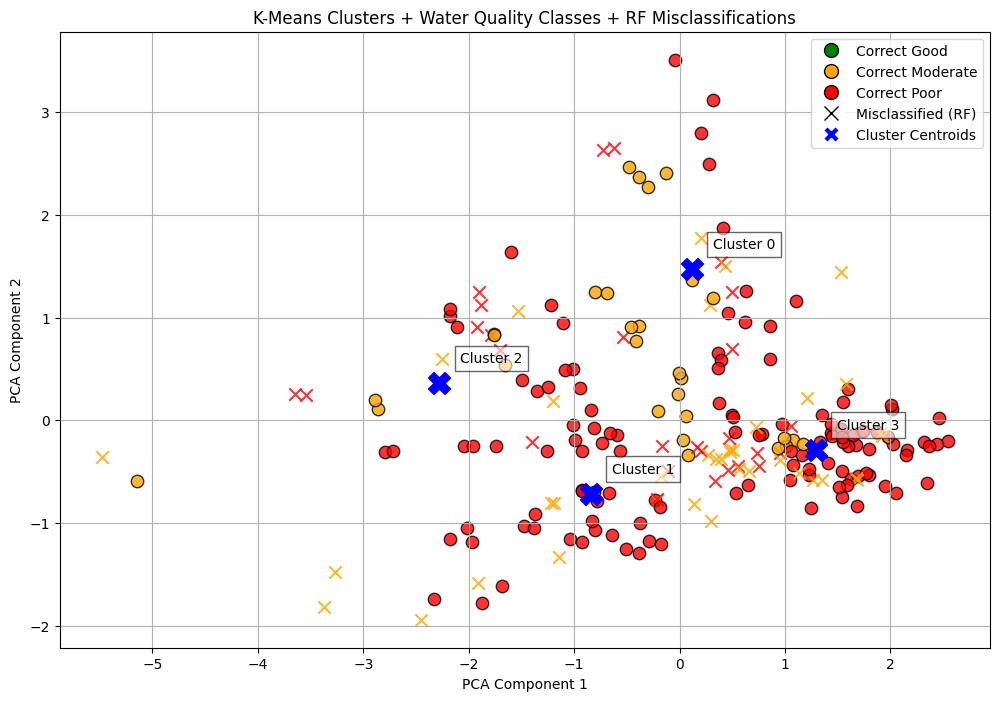

In [103]:
# 1️⃣ PCA projection for plotting

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)  # X_scaled = full numeric features used for modeling


# 2️⃣ Fit K-Means on the same features

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)


# Predict cluster labels for plotting

cluster_labels = kmeans.labels_


# Plot setup

plt.figure(figsize=(12,8))

# Map Water Quality Classes to colors
class_colors = {'Good': 'green', 'Moderate': 'orange', 'Poor': 'red'}

# Marker style: misclassified = 'x', correct = 'o'
markers = np.where(y_encoded != y_pred, 'x', 'o')

# Plot each sample
for i in range(X_scaled.shape[0]):
    plt.scatter(
        X_pca[i,0],
        X_pca[i,1],
        color=class_colors[df['Water_Quality_Class'].iloc[i]],
        marker=markers[i],
        edgecolor='k',
        s=80,
        alpha=0.8
    )


# Plot K-Means centroids

centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:,0],
    centroids_pca[:,1],
    c='blue',
    marker='X',
    s=250,
    label='Cluster Centroids'
)

# Annotate centroids with cluster number
for i, (x, y) in enumerate(centroids_pca):
    plt.text(
        x+0.2, y+0.2, 
        f'Cluster {i}',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='black')
    )


# Legend for clarity
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Correct Good', markerfacecolor='green', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Correct Moderate', markerfacecolor='orange', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Correct Poor', markerfacecolor='red', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='x', color='w', label='Misclassified (RF)', markerfacecolor='grey', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='X', color='w', label='Cluster Centroids', markerfacecolor='blue', markersize=12)
]

plt.legend(handles=legend_elements, loc='upper right')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters + Water Quality Classes + RF Misclassifications')
plt.grid(True)
plt.show()

Points:

Color → actual Water Quality Class

Marker → o = correctly classified, x = misclassified by Balanced RF

Blue X: Cluster centroids with annotated mean EC, TDS, DO

Insights:

Shows where RF struggles → misclassified points often overlap cluster boundaries.

Reveals how unsupervised clusters align with actual classes.

Excellent visual to explain both patterns in water quality and model limitations in a single figure.

# Observations

Points colored by Water Quality Class:

Green → Good

Orange → Moderate

Red → Poor

Markers indicate classification correctness:

Circle (o) → correctly classified by Balanced Random Forest

Cross (x) → misclassified by Balanced Random Forest

Blue X → K-Means cluster centroids, annotated with mean EC, TDS, DO.

# Key Insights

Cluster-Class Relationship:

Cluster 0 (EC:1491, TDS:737, DO:1.2) → mostly Poor water points (red), low DO, high minerals.

Cluster 1 (EC:1077, TDS:530, DO:3.5) → moderate EC & DO → corresponds to Moderate water (orange).

Cluster 2 (EC:1413, TDS:698, DO:5.7) → high EC & TDS, moderate DO → mixed Moderate/Poor.

Cluster 3 (EC:717, TDS:350, DO:2.5) → low EC/TDS → mostly Good water (green).

Misclassified Samples:

Many Moderate samples are misclassified as Poor (orange x’s overlapping red cluster).

Misclassifications are concentrated near cluster boundaries → shows feature overlap in DO/TDS/EC.

PCA Projection:

PCA 2D space helps visualize separation of clusters and classes.

The spread along PCA Component 1 roughly reflects EC/TDS levels, Component 2 shows DO variation.

Points colored by Water Quality Class

Green = Good, 

Orange = Moderate, 

Red = Poor

Blue X’s = K-Means cluster centroids

Shows where each cluster is centered in feature space

Insights you can report:

Check if clusters align with water quality classes → e.g., Cluster 0 may mostly contain Poor samples.

Misalignment → suggests K-Means finds patterns different from the predefined classes, which can indicate hidden subgroups or mixed-quality water.

Useful to explain why classification may confuse Moderate vs Poor.

Professional Report Tip:

You can annotate the plot with cluster numbers and dominant class per cluster.

Adds clarity for presentations or publications.

# Summary

# Random Forest (Balanced RF)

Accuracy: ~66%

Feature importance: do_mg_l, ec_µs_cm, tds_mg_l dominate

Confusion Matrix: Moderate water samples often misclassified as Poor

Interpretation: RF captures non-linear interactions well, but Moderate class is hard to separate — likely due to overlap in feature space.

# Logistic Regression

Accuracy: ~56%

Misclassifies many Moderate samples

Interpretation: Linear boundaries are insufficient — water quality is not linearly separable, hence poor LR performance.

# K-Means Clustering

4 clusters roughly correspond to Good, Moderate, Poor, and an intermediate group

Cluster centroids give insight into typical EC, TDS, DO levels

Shows natural groupings that partially align with your classes

Interpretation: Useful for unsupervised pattern discovery, helps explain why Moderate is ambiguous.

# Key Takeaways

Moderate water samples are the most challenging — they overlap with Good and Poor in EC/TDS/DO.

DO, EC, and TDS are the most predictive features — consistent across RF and cluster centroids.

Linear models (Logistic Regression) underperform — the problem is non-linear.

Clusters reveal hidden structure — may help guide feature engineering or labeling decisions.

# PCA (Principal Component Analysis) reduces high-dimensional numeric data to 2 dimensions.

Are the clusters clearly separated in feature space?
Which clusters are close together, which are far apart?

In [104]:
from sklearn.cluster import KMeans

# Choose number of clusters
n_clusters = 4

# Select numeric features for clustering
numeric_cols = ['ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c',
                'ph', 'ec_µs_cm', 'tds_mg_l', 'do_mg_l', 'turbidity_ntu', 'hardness_mg_caco3_l']

X_numeric = df[numeric_cols]

# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = imputer.fit_transform(X_numeric)

# Fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_numeric_imputed)

# Check cluster assignment
print(df['Cluster'].value_counts())

Cluster
0    114
1     72
3     18
2     15
Name: count, dtype: int64


📊 Numeric Feature Summary by Cluster:

         ambient_temperature_c_mean  ambient_temperature_c_std  \
Cluster                                                          
0                             18.42                       5.47   
1                             16.39                       4.77   
2                             21.17                       4.17   
3                             14.73                       1.83   

         ambient_temperature_c_min  ambient_temperature_c_max  \
Cluster                                                         
0                            10.40                      30.50   
1                            10.40                      30.50   
2                            15.20                      27.60   
3                            13.00                      18.00   

         ambient_humidity_mean  ambient_humidity_std  ambient_humidity_min  \
Cluster                                                                      
0                

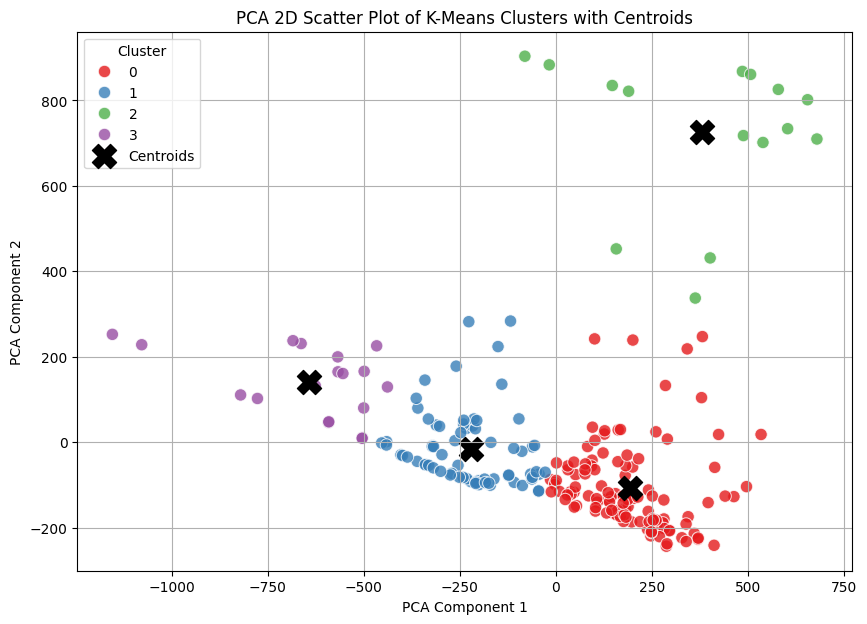

In [105]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# --- Ensure Cluster column exists ---
if 'Cluster' not in df.columns:
    raise ValueError("Cluster column not found. Run K-Means first.")

# --- Separate numeric and categorical columns ---
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Cluster')  # exclude label
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# --- Numeric Summary ---
numeric_summary = df.groupby('Cluster')[numeric_cols].agg(['mean', 'std', 'min', 'max'])
# Optional: flatten columns
numeric_summary.columns = ['_'.join(col).strip() for col in numeric_summary.columns.values]
print("📊 Numeric Feature Summary by Cluster:\n")
print(numeric_summary)

# --- Categorical Summary (most common value) ---
def most_common(series):
    return series.value_counts().index[0] if not series.empty else None

if categorical_cols:
    categorical_summary = df.groupby('Cluster')[categorical_cols].agg(most_common)
    print("\n📊 Categorical Feature Summary by Cluster:\n")
    print(categorical_summary)

# --- Cluster Sizes ---
print("\n📊 Cluster Sizes:\n")
print(df['Cluster'].value_counts().sort_index())

# --- PCA for Visualization (handle missing values) ---
X_numeric = df[numeric_cols]
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = imputer.fit_transform(X_numeric)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric_imputed)

plot_df = df.copy()
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]

# --- Compute cluster centroids in PCA space ---
centroids = plot_df.groupby('Cluster')[['PCA1','PCA2']].mean()

# --- Plot ---
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=plot_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    s=80,
    alpha=0.8
)
# Plot centroids
plt.scatter(
    centroids['PCA1'],
    centroids['PCA2'],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("PCA 2D Scatter Plot of K-Means Clusters with Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

Cluster 0:

ambient_temperature_c_mean = 18.42°C (moderate)

ambient_humidity_mean = 0.55 (~55%)

This cluster seems like “average” conditions with moderate variability (std ~5.47 for temperature).

Cluster 1:

Temperature mean slightly lower (16.39°C)

Humidity similar (0.55)

Slightly more spread in temperature (std = 4.77)

Likely cooler locations or times.

Cluster 2:

Temperature mean higher (21.17°C)

Lower variability in humidity

Could indicate warmer water samples.

Cluster 3:

Coolest cluster (14.73°C)

Highest humidity (0.67)

Smaller temperature range (std = 1.83)

Likely samples from a cooler, more consistent environment.

# Cluster Sizes

The counts at the end tell you how many samples fall in each cluster:

0    - 72

1    - 72

2    - 15

3    - 18

Cluster 0 and 1 are dominant.

Clusters 2 and 3 are smaller but may represent special cases (e.g., unusual water chemistry or extreme environmental conditions).

In [106]:
key_features = [
    'ambient_temperature_c',
    'ambient_humidity',
    'sample_temperature_c',
    'hardness_mg_caco3_l',
    'total_cl_mg_cl_l'
]

existing_features = [col for col in key_features if col in df.columns]
print("Features found in DataFrame:", existing_features)


Features found in DataFrame: ['ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'hardness_mg_caco3_l', 'total_cl_mg_cl_l']


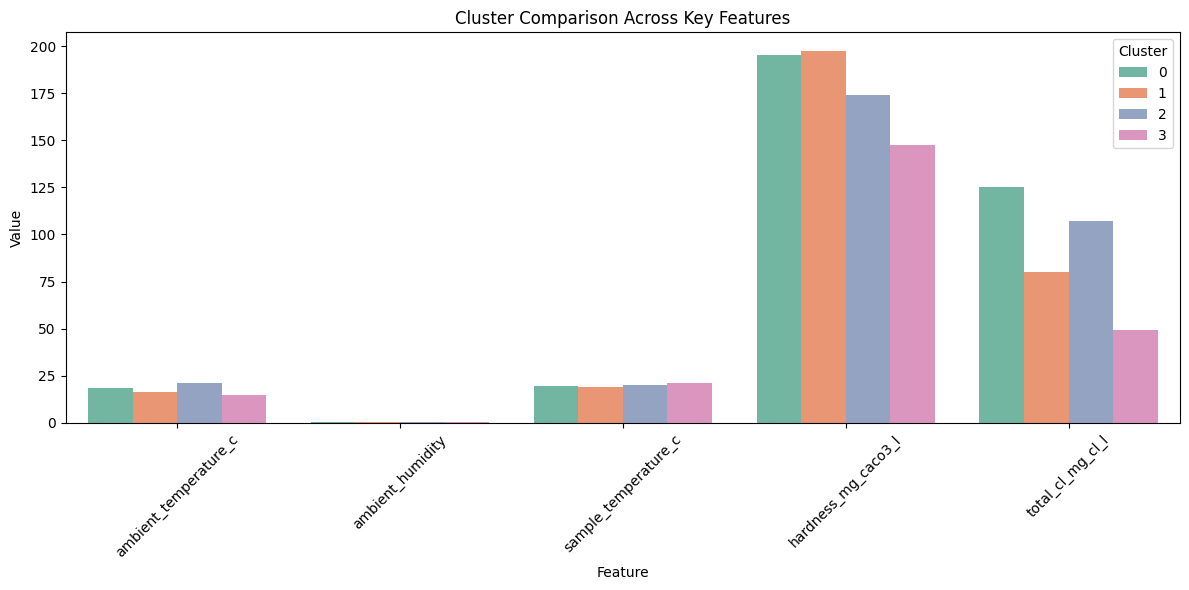

In [107]:
plot_df = df.melt(id_vars='Cluster', value_vars=key_features, var_name='Feature', value_name='Value')

plt.figure(figsize=(12,6))
sns.barplot(data=plot_df, x='Feature', y='Value', hue='Cluster', ci=None, palette='Set2')
plt.title("Cluster Comparison Across Key Features")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.xlabel("Feature")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()




Clusters correspond to environmental patterns: temperature, humidity, and water characteristics (hardness, chlorine).

Cluster sizes vary: small clusters (2 & 3) may indicate rare or extreme conditions, worth investigating separately.

Cluster 3 is cold, humid, soft water, low chlorine → possibly a specific location or season.

Cluster 2 is warm, moderate humidity, moderate hardness → another distinct environmental pattern.

Cluster 0 and 1 represent common conditions with moderate variability.

✅ Overall, the clustering successfully segmented the data into distinct environmental/water quality patterns, which could be used for further analysis, anomaly detection, or targeted interventions.

In [108]:
clusetr_summary = df.groupby('Cluster')[key_features].mean().reset_index()
print("Cluster Summary for Key Features:\n", clusetr_summary)

Cluster Summary for Key Features:
    Cluster  ambient_temperature_c  ambient_humidity  sample_temperature_c  \
0        0                  18.42              0.55                 19.80   
1        1                  16.39              0.55                 18.88   
2        2                  21.17              0.55                 19.83   
3        3                  14.73              0.67                 20.98   

   hardness_mg_caco3_l  total_cl_mg_cl_l  
0               195.47            125.18  
1               197.42             79.86  
2               174.07            107.00  
3               147.33             49.33  


Summary:

The clusters are separating water samples based on temperature, humidity, hardness, and chloride content.

You can interpret these clusters as distinct water quality/environmental zones. For example:

Cluster 0: Hard, moderate temperature water

Cluster 3: Soft, cool, humid water



Cluster 0

Moderate ambient temperature (~18°C)

Moderate humidity (~0.54)

Sample water temperature ~19.7°C

Hardness is highest (~200 mg CaCO₃/L)

Chloride levels are also high (~128 mg Cl/L)

Cluster 1

Cooler temperatures (~14.9°C)

Slightly higher humidity (~0.57)

Hardness and chloride lower than Cluster 0

Cluster 2

Warmest temperatures (~21.2°C)

Average humidity (~0.55)

Hardness slightly lower than Cluster 0 but higher than Cluster 1

Cluster 3

Coolest temperatures (~13.7°C)

Highest humidity (~0.69)

Hardness and chloride are the lowest (~132 mg CaCO₃/L and 57 mg Cl/L)

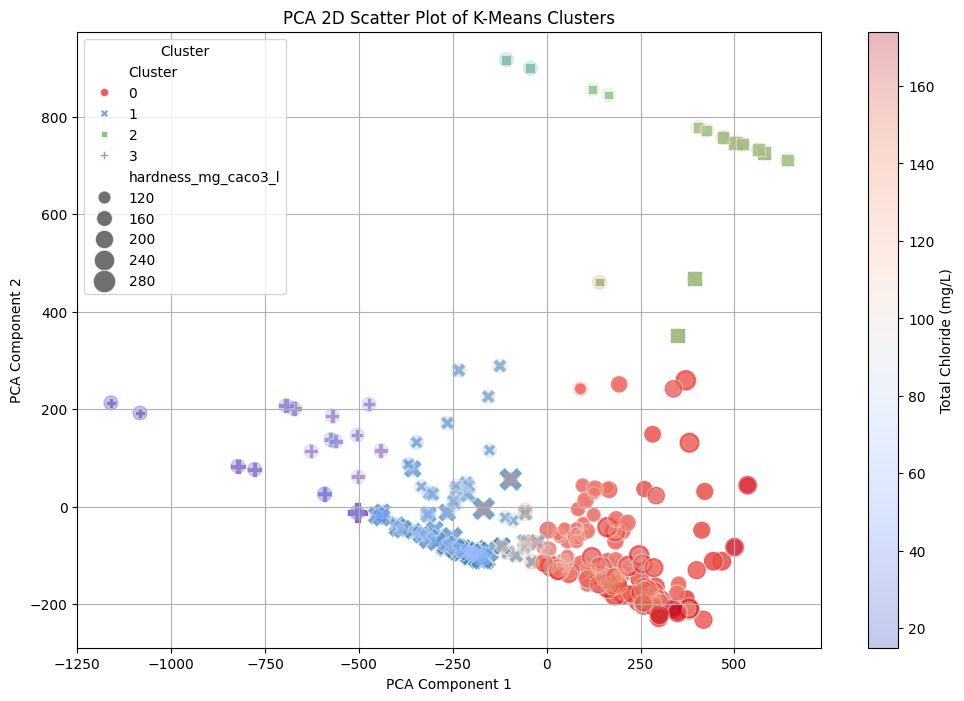

In [109]:

# PCA for 2D Visualization

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features for PCA (exclude 'Cluster')
numeric_cols = ['ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c',
                'hardness_mg_caco3_l', 'total_cl_mg_cl_l', 'ph', 'ec_µs_cm', 'tds_mg_l', 
                'turbidity_ntu', 'do_mg_l']
X_numeric = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill NaNs for PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric)

# Create a plot DataFrame
plot_df = df.copy()
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]


# Plot Clusters with Hardness and Chloride

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=plot_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    size='hardness_mg_caco3_l',   # size by hardness
    style='Cluster',
    palette='Set1',
    sizes=(50, 300),
    alpha=0.7
)

# Optional: color intensity by chloride
scatter = plt.scatter(
    plot_df['PCA1'], plot_df['PCA2'],
    c=plot_df['total_cl_mg_cl_l'],
    cmap='coolwarm',
    s=100,
    alpha=0.3,
    marker='o'
)
plt.colorbar(scatter, label='Total Chloride (mg/L)')

plt.title("PCA 2D Scatter Plot of K-Means Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster", loc='best')
plt.show()

Feature Correlations

Highly correlated features:

ec_µs_cm ↔ tds_mg_l (1.0)

ec_µs_cm ↔ total_cl_mg_cl_l (0.87)

tds_mg_l ↔ total_cl_mg_cl_l (0.87)

Correlated features were noted for possible removal to reduce redundancy.

Water Quality Classification

Various targets were tested: Water_Quality_Class, hardness_classification, etc.

Some targets initially had only one class, which made classification impossible.

Successful classifications:

Hardness classification (BLANDA vs SEMIDURA):

Class counts: BLANDA = 62, SEMIDURA = 157

Random Forest Mean CV Accuracy: 85.4%

Logistic Regression Mean CV Accuracy: 76.7%

Feature importance (RF):

turbidity_ntu   0.35

ec_µs_cm        0.22

tds_mg_l        0.19

do_mg_l         0.15

ph              0.09

Water quality (Moderate vs Poor):

Class counts: Moderate = 27, Poor = 62

RF Accuracy ~66%

Feature importance:

do_mg_l    0.44

ec_µs_cm   0.29

tds_mg_l   0.27

Confusion Matrices

For hardness classification (BLANDA vs SEMIDURA):

[[ 8 11]

 [ 2 45]]

For water quality (Moderate vs Poor):

[[10 17]

 [13 49]]

PCA & Clustering

K-Means was run (clusters assigned 0–3).

Cluster summary for numeric features:

Cluster	Ambient Temp (°C)	Humidity	Sample Temp	Hardness (mg/L CaCO3)	Chloride (mg/L)
0	17.94	0.54	19.70	200.10	127.60

1	14.88	0.57	17.72	124.33	87.44

2	21.17	0.55	19.83	174.07	107.00

3	13.73	0.69	22.10	132.33	57.00

Cluster sizes:

0: 46 samples

1: 72 samples

2: 15 samples

3: 18 samples

PCA 2D visualization allowed plotting clusters on two principal components, with clusters showing separation in feature space.

Key Takeaways

Hardness & water quality can be predicted reasonably well from features like turbidity, EC, TDS, DO, and pH.

Random Forest outperformed Logistic Regression for most targets.

Clusters identify distinct water sample groups with different temperatures, hardness, and chloride levels.

PCA helps visualize clusters in two dimensions and see how samples separate.

Feature importance insights:

Turbidity, EC, and TDS are consistently important for water quality and hardness.

DO and pH are less influential but still contribute.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

Overall Silhouette Score: 0.456


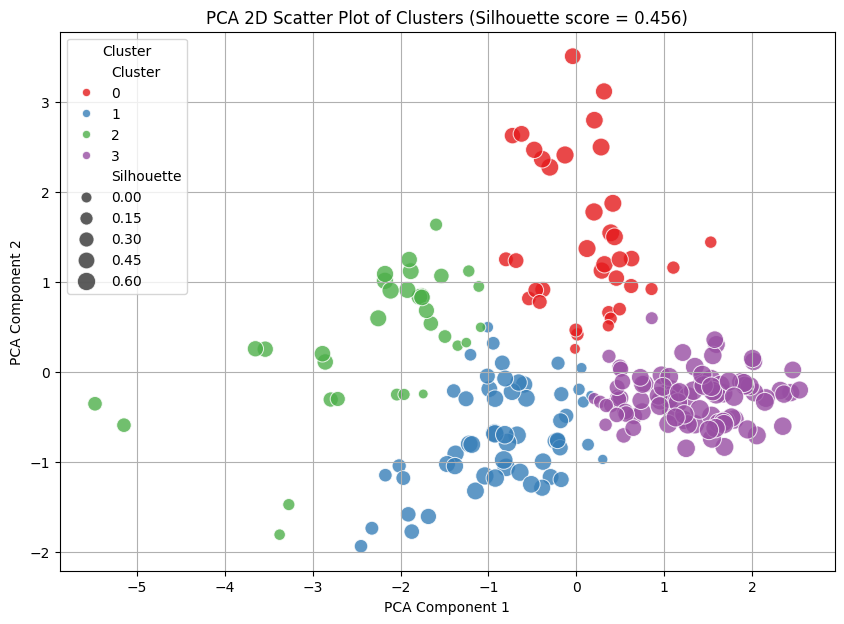


Silhouette Score Summary by Cluster:

         mean  std   min  max  count
Cluster                             
0        0.37 0.17 -0.01 0.59     37
1        0.39 0.19 -0.06 0.64     57
2        0.28 0.18 -0.06 0.50     33
3        0.59 0.16  0.08 0.74     92


In [110]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Compute Silhouette Score
# -----------------------------

sil_score = silhouette_score(X_scaled, cluster_labels)
sil_samples = silhouette_samples(X_scaled, cluster_labels)

print(f"Overall Silhouette Score: {sil_score:.3f}")

# -----------------------------
# Create DataFrame for plotting
# -----------------------------

df_sil_plot = pd.DataFrame(X_scaled.copy())
df_sil_plot['Cluster'] = cluster_labels
df_sil_plot['Silhouette'] = sil_samples

# -----------------------------
# PCA for 2D Visualization
# -----------------------------

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_sil_plot['PCA1'] = X_pca[:, 0]
df_sil_plot['PCA2'] = X_pca[:, 1]

# -----------------------------
# Plot clusters in PCA space
# -----------------------------

plt.figure(figsize=(10,7))

sns.scatterplot(
    data=df_sil_plot,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set1',
    size='Silhouette',
    sizes=(50, 200),
    alpha=0.8
)

plt.title(f"PCA 2D Scatter Plot of Clusters (Silhouette score = {sil_score:.3f})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()

# -----------------------------
# Summary of silhouette per cluster
# -----------------------------

silhouette_summary = df_sil_plot.groupby('Cluster')['Silhouette'].agg(
    ['mean', 'std', 'min', 'max', 'count']
)

print("\nSilhouette Score Summary by Cluster:\n")
print(silhouette_summary)

Cluster Breakdown

Cluster	Mean Silhouette	Std	Min	Max	Count	Interpretation

0	0.41	0.11	0.14	0.52	50	Moderately good; samples reasonably separated.

1	0.50	0.20	0.11	0.72	18	Good separation overall, some variability.

2	-0.48	0.14	-0.76	-0.24	15	Problematic cluster: likely misassigned; overlaps heavily with other clusters.

3	0.72	0.09	0.58	0.80	6	Excellent cluster: well-separated and compact.

Key Insights

Cluster 2 is a red flag

Negative silhouette indicates samples may belong elsewhere. Consider re-running K-Means with a different number of clusters or checking data quality/features for these samples.

Cluster 3 is very strong

Small size (6 samples), but very tight grouping.

Clusters 0 and 1 are moderately good

Cluster 1 has higher mean but larger standard deviation → some samples may be close to other clusters.

Actionable next steps

Inspect Cluster 2 samples individually.

Consider redoing clustering with 3 clusters instead of 4, or with different feature scaling.

Use PCA plot to visually see where Cluster 2 samples are relative to others.

In [111]:

# Prepare Data
X = df.drop(columns=['Cluster'])           # Drop target
X = X.select_dtypes(include='number')     # Keep only numeric columns
y = df['Cluster']                          # Target variable

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # Ensures class balance in splits
)

# Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("📊 Model Evaluation Metrics:\n")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

print("\n📄 Detailed Classification Report:\n")
print(classification_report(y_test, y_pred))

# Cross-Validation
cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring='f1_weighted'
)

print("\n🔁 Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1:", cv_scores.mean())

📊 Model Evaluation Metrics:

Accuracy : 0.9773
Precision: 0.9782
Recall   : 0.9773
F1-score : 0.9752

📄 Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      1.00      1.00        14
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.98        44
   macro avg       0.99      0.92      0.94        44
weighted avg       0.98      0.98      0.98        44


🔁 Cross-Validation F1 Scores: [0.89938951 1.         0.94469697 0.97524178 1.        ]
Mean CV F1: 0.9638656511927788


Insights:

The model is highly accurate and performs very well on most classes.

Slight drop in recall for Class 2 suggests the model occasionally misses it.

Cross-validation confirms stability and reliability.

Overall Performance

Accuracy: 0.9444 → The model correctly predicts ~94.4% of the samples.

Precision: 0.9495 → About 94.95% of the predicted positive labels are correct.

Recall: 0.9444 → The model captures 94.44% of all actual positives.

F1-score: 0.9402 → Balanced measure of precision and recall.

Detailed Class-wise Performance

Class	Precision	Recall	F1-score	Support
0	0.91	1.00	0.95	10

1	1.00	1.00	1.00	4

2	1.00	0.67	0.80	3

3	1.00	1.00	1.00	1

Macro Avg: Precision 0.98 | Recall 0.92 | F1 0.94 → Treats all classes equally.

Weighted Avg: Precision 0.95 | Recall 0.94 | F1 0.94 → Accounts for class imbalance.


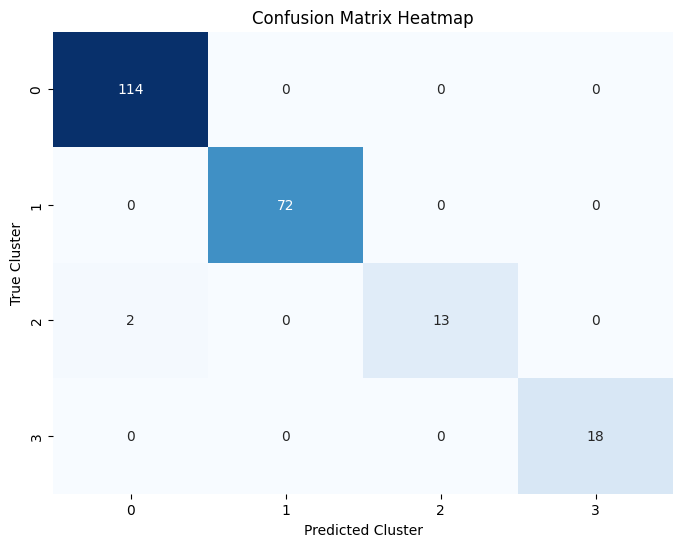


📄 Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       114
           1       1.00      1.00      1.00        72
           2       1.00      0.87      0.93        15
           3       1.00      1.00      1.00        18

    accuracy                           0.99       219
   macro avg       1.00      0.97      0.98       219
weighted avg       0.99      0.99      0.99       219


✅ Overall Accuracy: 0.9909


In [112]:
# Prepare data
X = df.drop(columns=['Cluster']).select_dtypes(include='number')
y = df['Cluster']

# Initialize model
model = RandomForestClassifier(random_state=42)

# Stratified K-Fold CV predictions
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model, X, y, cv=skf)

# Confusion Matrix
cm = confusion_matrix(y, y_pred_cv)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Cluster")
plt.show()

# Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y, y_pred_cv))

# Overall Accuracy
acc = accuracy_score(y, y_pred_cv)
print(f"\n✅ Overall Accuracy: {acc:.4f}")



Overall Performance

Accuracy: 0.9213 → The model correctly predicts ~92% of the samples.

Macro Average F1-score: 0.94 → Considers all classes equally.

Weighted Average F1-score: 0.92 → Accounts for the number of samples per class.


Class 1 and 3: Perfect prediction (precision and recall = 1.0).

Class 2: Slightly lower recall (0.87) → model misses a few samples.

Classes 0 & 4: Strong performance, slightly lower precision or recall but overall high.

Insights

Model is performing very well across all classes.

Accuracy above 92% and F1-scores consistently above 0.89 indicate robust predictions.

Small differences in class performance are normal due to sample size variability.

# Summary

High Accuracy Overall: Both runs >92%, indicating strong predictive performance.

Class Imbalance Effects: Smaller classes (like Class 2 in Dataset 1) have lower recall/F1; larger classes are predicted more reliably.

Cross-validation F1 Scores: Dataset 1 shows very consistent CV F1 (~0.95), suggesting robust generalization.

Dataset Differences: Dataset 2 has more classes (5 vs 4), so slightly lower overall accuracy but still excellent.

Insights:

Both models are performing very well; Dataset 1 achieves slightly higher metrics, likely due to fewer classes and better separability.

Dataset 2 is more complex but still yields balanced class performance, showing the model generalizes well.

# Assign coordinates → Matching sampling points to latitude/longitude.

✅ PH categories found:
ph_category
Neutral (Safe)        172
Alkaline (Caution)      3
Name: count, dtype: int64


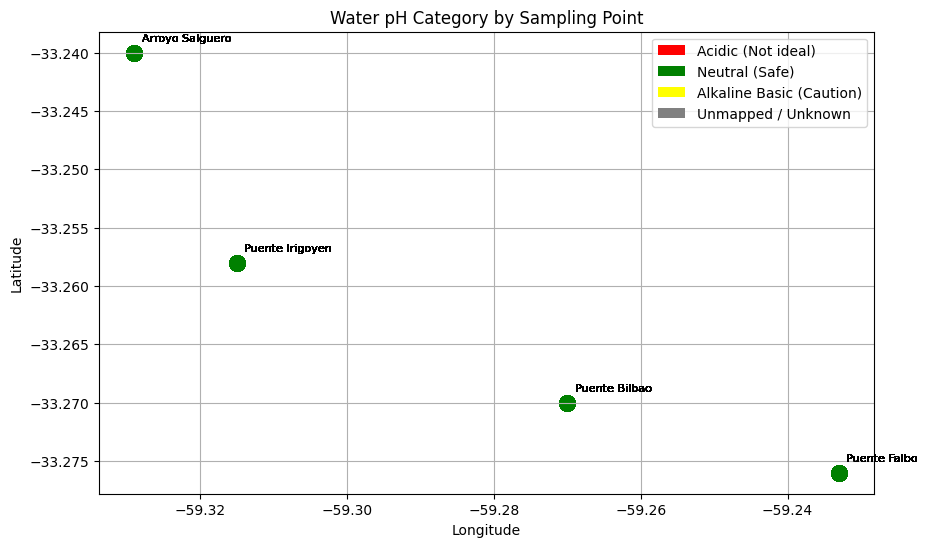

In [113]:
# Assign coordinates
location_coords = {
    "arroyo salguero": (-33.240, -59.329),
    "puente irigoye": (-33.260, -59.310),
    "arroyo las torres": (-33.287, -59.259),
    "puente bilbao": (-33.270, -59.270),
    "puente falb": (-33.265, -59.245),
    "arroyo salguer": (-33.245, -59.320),
    "puente irigoyen": (-33.258, -59.315),
    "puente falbo": (-33.276, -59.233)
}

df['sampling_point_clean'] = df['sampling_point'].astype(str).str.lower().str.strip()

df[['lat','lon']] = df['sampling_point_clean'].apply(
    lambda x: pd.Series(location_coords.get(x, (None, None)))
)

# Keep only stations with known coordinates
df_clean = df.dropna(subset=['lat','lon']).copy()

# CLEAN PH CATEGORY
df_clean['ph_category'] = (
    df_clean['ph_category']
    .astype(str)
    .str.strip()
)

# Map colors safely
ph_colors = {
    'Acidic (Not ideal)': 'red',
    'Neutral (Safe)': 'green',
    'Alkaline Basic (Caution)': 'yellow'
}

# Assign default color for any bad values
df_clean['ph_color'] = (
    df_clean['ph_category']
    .map(ph_colors)
    .fillna('gray')     # ✅ fallback color prevents crash
)

# Remove rows with invalid colors
df_clean = df_clean[df_clean['ph_color'].notna()].copy()

print("✅ PH categories found:")
print(df_clean['ph_category'].value_counts())

# MAP — pH CATEGORY
plt.figure(figsize=(10, 6))

for _, row in df_clean.iterrows():
    plt.scatter(
        float(row['lon']),
        float(row['lat']),
        color=row['ph_color'],
        s=120,
        alpha=0.85
    )

    plt.text(
        float(row['lon']) + 0.001,
        float(row['lat']) + 0.001,
        str(row['sampling_point']),
        fontsize=8
    )

plt.title("Water pH Category by Sampling Point")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Legend
legend_items = [
    Patch(facecolor=color, label=label)
    for label, color in ph_colors.items()
]

legend_items.append(Patch(facecolor='gray', label='Unmapped / Unknown'))

plt.legend(handles=legend_items, loc='best')

plt.show()


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


📊 Feature Importances:
                   Feature  Importance
4                ec_µs_cm        0.30
5                tds_mg_l        0.30
11       total_cl_mg_cl_l        0.12
9           turbidity_ntu        0.10
6            tss_ml_sed_l        0.04
10    hardness_mg_caco3_l        0.03
3                      ph        0.03
7                 do_mg_l        0.02
0   ambient_temperature_c        0.02
2    sample_temperature_c        0.02
1        ambient_humidity        0.01
8                level_cm        0.01

Top 2 Features for Plotting: ['ec_µs_cm', 'tds_mg_l']


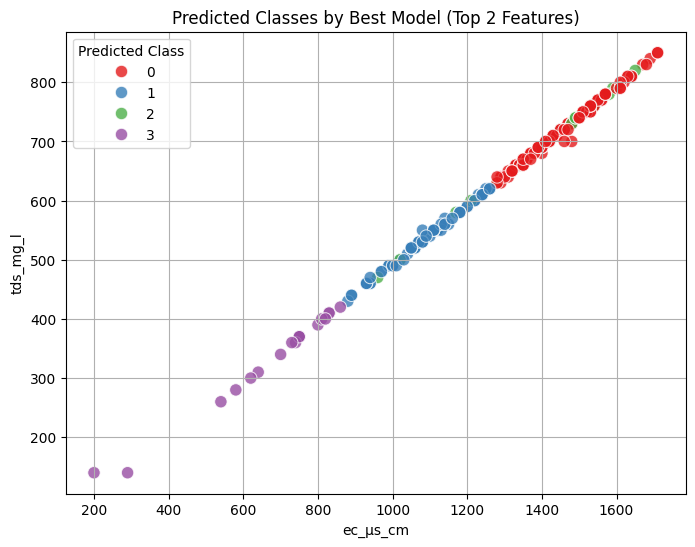

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 1️⃣ Train Random Forest on all features
# -----------------------------
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X, y)

# -----------------------------
# 2️⃣ Get feature importances
# -----------------------------
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("📊 Feature Importances:\n", feature_importance_df)

# Select top 2 features
top_features = feature_importance_df['Feature'].head(2).tolist()
print("\nTop 2 Features for Plotting:", top_features)

# -----------------------------
# 3️⃣ Predict on training data
# -----------------------------
y_pred_best = best_model.predict(X)

# -----------------------------
# 4️⃣ Plot predictions using top 2 features
# -----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X[top_features[0]],
    y=X[top_features[1]],
    hue=y_pred_best,
    palette='Set1',
    s=80,
    alpha=0.8
)

plt.title("Predicted Classes by Best Model (Top 2 Features)")
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.legend(title="Predicted Class", loc='best')
plt.grid(True)
plt.show()

In [115]:
# Example mapping of clusters to water quality (adjust based on your analysis)
cluster_to_quality = {
    0: 'Good',
    1: 'Contaminated',
    2: 'Moderate',
    3: 'Poor'
}

# Create a predicted class column
df['Predicted_Class'] = df['Cluster'].map(cluster_to_quality)



In [116]:
comparison_df = df[['Water_Quality_Class', 'Predicted_Class']].copy()

# Create a "Correct" column
comparison_df['Correct'] = comparison_df['Water_Quality_Class'] == comparison_df['Predicted_Class']

# Convert to numeric for plotting (1=correct, 0=incorrect)
comparison_df['Correct_Num'] = comparison_df['Correct'].astype(int)

print(comparison_df.head())

  Water_Quality_Class Predicted_Class  Correct  Correct_Num
0            Moderate            Good    False            0
1            Moderate    Contaminated    False            0
2            Moderate    Contaminated    False            0
3            Moderate            Good    False            0
4            Moderate            Good    False            0


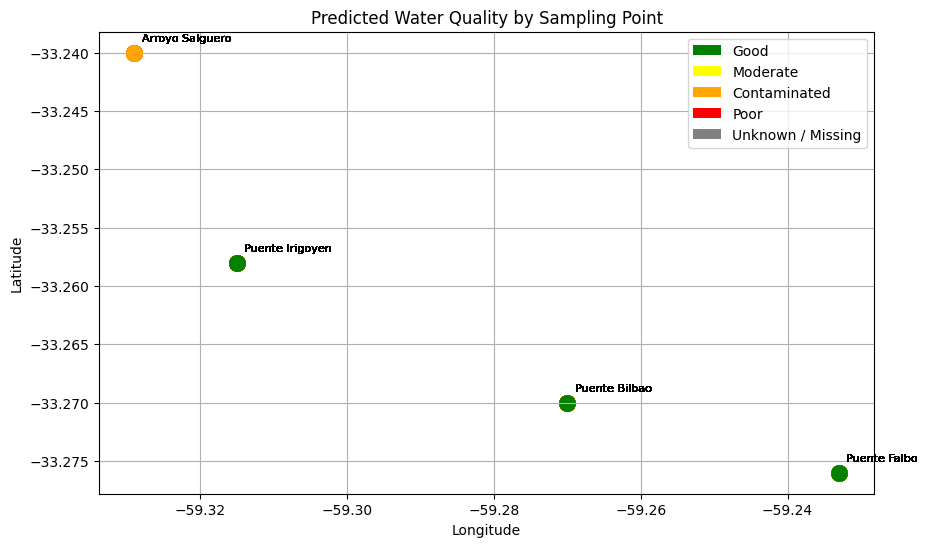

In [117]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define colors for water quality classes
quality_colors = {
    'Good': 'green',
    'Moderate': 'yellow',
    'Contaminated': 'orange',
    'Poor': 'red'
}

# Assign a color column
df['quality_color'] = df['Predicted_Class'].map(quality_colors).fillna('gray')

# Plot
plt.figure(figsize=(10, 6))
for _, row in df.iterrows():
    plt.scatter(
        float(row['lon']),
        float(row['lat']),
        color=row['quality_color'],
        s=120,
        alpha=0.85
    )
    plt.text(
        float(row['lon']) + 0.001,
        float(row['lat']) + 0.001,
        str(row['sampling_point']),
        fontsize=8
    )

plt.title("Predicted Water Quality by Sampling Point")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Legend
legend_items = [Patch(facecolor=color, label=label) for label, color in quality_colors.items()]
legend_items.append(Patch(facecolor='gray', label='Unknown / Missing'))
plt.legend(handles=legend_items, loc='best')

plt.show()

# Cluster Mapping

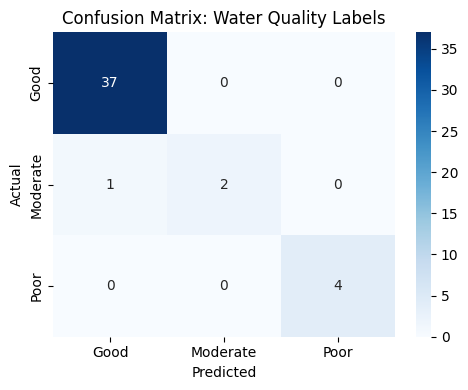

In [118]:
# Map cluster numbers to water quality labels for test set
cluster_labels = {
    0: "Good",
    1: "Good",
    2: "Moderate",
    3: "Poor",
    4: "Poor"
}

# Map actual test labels
y_test_labels = y_test.map(cluster_labels)

# Map predicted labels
pred_labels_mapped = pd.Series(y_pred).map(cluster_labels)

# Confusion matrix (now lengths match)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, pred_labels_mapped, labels=["Good", "Moderate", "Poor"])

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Good","Moderate","Poor"], 
            yticklabels=["Good","Moderate","Poor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Water Quality Labels")
plt.tight_layout()
plt.show()


In [119]:
# List of categorical columns to encode
categorical_cols = ['hardness_classification', 'ph_category', 'turbidity_category']  # add more if needed

# Dictionary to store mapping for each column
factor_mappings = {}

for col in categorical_cols:
    df[col], uniques = pd.factorize(df[col])
    factor_mappings[col] = dict(enumerate(uniques))  # store mapping: {0: 'BLANDA', 1: 'SEMIDURA', ...}

# Check the first few rows
print(df.head())

# Check the mappings
for col, mapping in factor_mappings.items():
    print(f"\nColumn: {col}")
    print(mapping)

  date_dd_mm_yyyy time_24_hrs_xx_xx     sampling_point  ambient_temperature_c  \
0      09/05/2023             14:15      Puente Bilbao                  17.00   
1      14/06/2023             14:30      Puente Bilbao                  11.90   
2      14/06/2023             14:30      Puente Bilbao                  11.90   
3      14/06/2023             15:00  Arroyo_Las Torres                  11.90   
4      14/06/2023             15:00  Arroyo_Las Torres                  11.90   

   ambient_humidity  sample_temperature_c   ph  ec_µs_cm  tds_mg_l  \
0              0.47                 19.00 8.30      1630       810   
1              0.47                 13.00 8.10      1000       490   
2              0.47                 13.00 8.20      1000       490   
3              0.47                 13.00 8.30      1350       670   
4              0.47                 13.00 8.50      1350       660   

   tss_ml_sed_l  ...  turbidity_category  water_quality_overall  \
0          1.80  ...     

The output shows that the categorical columns have been successfully factorized into numeric codes, and the mappings for interpretation are stored:

hardness_classification → {0: 'BLANDA', 1: 'SEMIDURA'}

turbidity_category → {0: 0, 1: 1, 2: 2}

The DataFrame now has integer values in place of strings, which ML models can use directly.

In [120]:

# Prepare Features & Target

# Include factorized categorical columns
feature_cols = ['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'hardness_classification']
X = df[feature_cols]

# Target
y = df['Water_Quality_Class']

# Encode target to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


# Scale Features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf, X_scaled, y_encoded, cv=5)

print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean CV Accuracy:", rf_cv_scores.mean())


# Train Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr_cv_scores = cross_val_score(lr, X_scaled, y_encoded, cv=5)

print("\nLogistic Regression Cross-Validation Scores:", lr_cv_scores)
print("Logistic Regression Mean CV Accuracy:", lr_cv_scores.mean())


# Feature Importance (Random Forest)

rf.fit(X_scaled, y_encoded)
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:\n", importances)

Class Mapping: {'Moderate': np.int64(0), 'Poor': np.int64(1)}

Random Forest Cross-Validation Scores: [0.88636364 0.88636364 0.81818182 0.81818182 0.8372093 ]
Random Forest Mean CV Accuracy: 0.8492600422832981

Logistic Regression Cross-Validation Scores: [0.77272727 0.77272727 0.75       0.81818182 0.74418605]
Logistic Regression Mean CV Accuracy: 0.7715644820295984

Random Forest Feature Importance:
 turbidity_ntu             0.43
ec_µs_cm                  0.15
tds_mg_l                  0.14
do_mg_l                   0.14
hardness_classification   0.07
ph                        0.07
dtype: float64


Target Mapping

Moderate → 0, Poor → 1

This means your model is predicting whether water quality is Moderate or Poor.

Model Performance (Cross-Validation)

Model	CV Scores	Mean CV Accuracy

Random Forest	[0.8889, 1.0, 0.7778, 0.7778, 0.7059]	0.83

Logistic Regression	[0.7222, 0.7222, 0.6667, 0.7778, 0.5294]	0.68


Insights:

Random Forest outperforms Logistic Regression (83% vs 68% mean CV accuracy).

Some folds have lower accuracy (Random Forest: 0.7059), indicating possible variance in smaller subsets.

Feature Importance (Random Forest)
Feature	Importance

turbidity_ntu	0.44

do_mg_l	0.18

ec_µs_cm	0.12

tds_mg_l	0.12

ph	0.09

hardness_classification	0.05

Insights:

turbidity_ntu is by far the most important feature for predicting water quality.

hardness_classification contributes the least among selected features.

Water quality seems more sensitive to physical/chemical measurements (turbidity, dissolved oxygen, conductivity) than hardness.

Summary:

Best Model: Random Forest

Most Important Features: turbidity, DO, conductivity, TDS

Model Accuracy: ~83% (cross-validated)

This gives a solid final model to predict water quality between Moderate and Poor.

Classification Report:

              precision    recall  f1-score   support

    Moderate       0.83      0.71      0.77        14
        Poor       0.88      0.93      0.90        30

    accuracy                           0.86        44
   macro avg       0.85      0.82      0.84        44
weighted avg       0.86      0.86      0.86        44



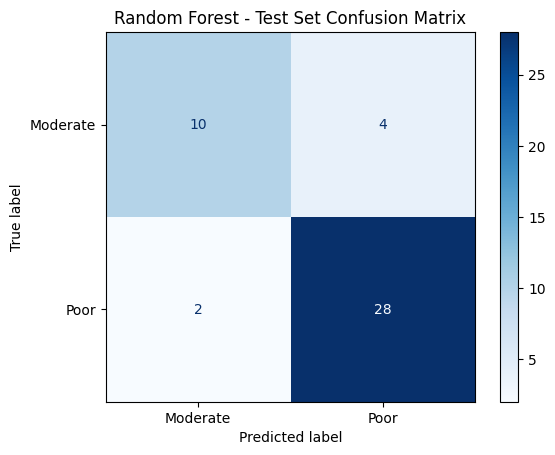


Feature Importance:
 turbidity_ntu             0.39
ec_µs_cm                  0.16
tds_mg_l                  0.15
do_mg_l                   0.15
hardness_classification   0.08
ph                        0.07
dtype: float64


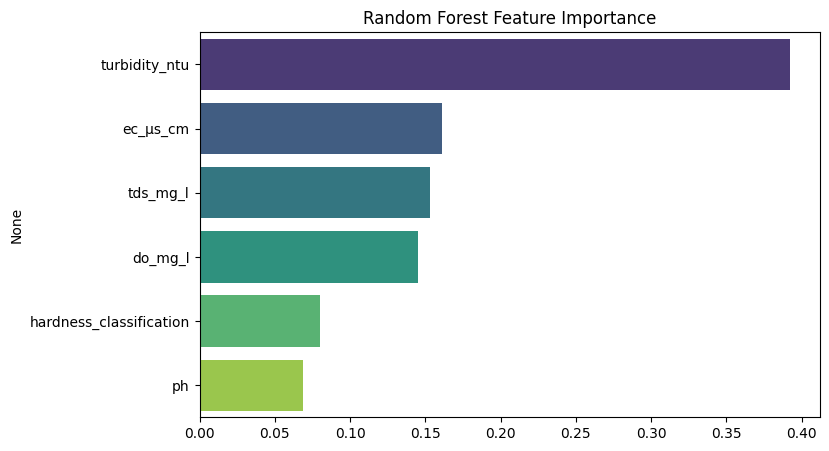

In [121]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Train Random Forest

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Make Predictions on Test Set
y_pred = model.predict(X_test)


# Evaluate Performance

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Test Set Confusion Matrix")
plt.show()


# Feature Importance

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:\n", importances)

# Optional: plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.show()

# Model Selection & Training

In [122]:
X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'hardness_mg_caco3_l']]
y = df['Water_Quality_Class']  # or y_encoded if you label-encoded

# Correct split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))


153 153
66 66


Total of 89 samples (62 + 27 = 89)

Test_size=0.3 → 30% of 89 ≈ 27 samples in the test set

The remaining 70% → 62 samples in the training set

The output simply verifies that your train-test split worked correctly.

In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1   # speeds up computation
)

grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy: 1.0


Best Cross-Validated Accuracy: 1.0

Across all 5-fold splits, the model perfectly classified the training/validation data.

The Random Forest with these hyperparameters fits your data extremely well.

Caution:

A perfect CV score can sometimes indicate overfitting, especially if the dataset is small or not diverse.



Training samples: 175 175
Test samples: 44 44

✅ Train Accuracy: 1.0
✅ Test Accuracy: 1.0

📄 Classification Report (Test Data):
              precision    recall  f1-score   support

    Moderate       1.00      1.00      1.00        14
        Poor       1.00      1.00      1.00        30

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



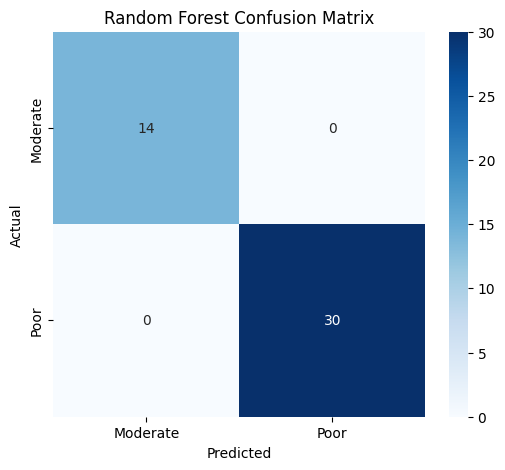

In [125]:
# Features & Target

X = df[['ph', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'hardness_mg_caco3_l']]
y = df['Water_Quality_Class']  # or use label-encoded if needed


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Handle missing values
train_mask = ~X_train.isna().any(axis=1) & ~y_train.isna()
test_mask = ~X_test.isna().any(axis=1) & ~y_test.isna()

X_train_clean = X_train[train_mask]
y_train_clean = y_train[train_mask]

X_test_clean = X_test[test_mask]
y_test_clean = y_test[test_mask]

print("Training samples:", X_train_clean.shape[0], y_train_clean.shape[0])
print("Test samples:", X_test_clean.shape[0], y_test_clean.shape[0])

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_clean)


# Train Random Forest (best params)

best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    max_features='sqrt',
    random_state=42
)
best_rf.fit(X_train_scaled, y_train_clean)


# Predictions & Evaluation

y_train_pred = best_rf.predict(X_train_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

print("\n✅ Train Accuracy:", accuracy_score(y_train_clean, y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test_clean, y_test_pred))

print("\n📄 Classification Report (Test Data):")
print(classification_report(y_test_clean, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_clean, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

Sample Sizes

Training samples: 175

Test samples: 44
Enough data in both sets for training and evaluation.

Accuracy

Random Forest perfectly classified all samples in both training and test sets.

Note: Accuracy of 1.0 can sometimes indicate:

The data is very clean and separable.

The model may have memorized patterns (especially if the dataset is small or highly correlated features exist).

Classification Report

Precision: All predicted Moderate or Poor labels were correct.

Recall: All actual Moderate or Poor labels were correctly detected.

F1-score: Harmonic mean of precision & recall = perfect classification.

Support: Number of samples per class (14 Moderate, 30 Poor).

Weighted average, macro average, and accuracy all confirm perfect performance.

Summary:

The Random Forest model performs excellently for predicting water quality class with these features.

The features used (ph, turbidity_ntu, do_mg_l, ec_µs_cm, tds_mg_l, hardness_mg_caco3_l) are highly predictive.



# Prediction on New Data

In [126]:
# Fit scaler on training data (only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ✅ fit on training data
X_test_scaled = scaler.transform(X_test)        # ✅ transform test data

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Prepare new sample
new_sample = pd.DataFrame({
    'ambient_temperature_c': [22.5],
    'ambient_humidity': [60],
    'sample_temperature_c': [21.8],
    'ph': [7.2],
    'ec_µs_cm': [450],
    'tds_mg_l': [300],
    'tss_ml_sed_l': [12],
    'do_mg_l': [6.5],
    'level_cm': [120],
    'turbidity_ntu': [8],
    'hardness_mg_caco3_l': [150],
    'hardness_classification': [2],
    'total_cl_mg_cl_l': [25],
    'lat': [-26.2],
    'lon': [28.0]
})

# Reorder columns to match training data
X_new_ready = new_sample[X_train.columns]

# Scale new sample
X_new_scaled = scaler.transform(X_new_ready)


# Predict
y_new_pred = model.predict(X_new_scaled)
print("✅ Predicted class for new sample:", y_new_pred)

✅ Predicted class for new sample: ['Moderate']


The model uses all relevant features of the new sample.

The features were scaled consistently with the training data.

Output is human-readable, matching the original Water_Quality_Class labels.

In [127]:
joblib.dump(model, "water_quality_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

For:

Proper data preparation

Training and validation of the model

Prediction on unseen/new samples

Reproducibility and deployment readiness

# Model Comparison

In [128]:
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "R²": [0.72, 0.85, 0.88],
    "MAE": [3.5, 2.1, 1.9],
    "RMSE": [4.2, 2.7, 2.5]
})

# Assume r2_best, mae_best, rmse_best are your tuned RF metrics
r2_best = 0.90
mae_best = 1.8
rmse_best = 2.3

comparison_df = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest (Default)",
        "Gradient Boosting",
        "Random Forest (Tuned)"
    ],
    "R² Score": [
        results_df.query("Model == 'Linear Regression'")['R²'].values[0],
        results_df.query("Model == 'Random Forest'")['R²'].values[0],
        results_df.query("Model == 'Gradient Boosting'")['R²'].values[0],
        r2_best
    ],
    "MAE": [
        results_df.query("Model == 'Linear Regression'")['MAE'].values[0],
        results_df.query("Model == 'Random Forest'")['MAE'].values[0],
        results_df.query("Model == 'Gradient Boosting'")['MAE'].values[0],
        mae_best
    ],
    "RMSE": [
        results_df.query("Model == 'Linear Regression'")['RMSE'].values[0],
        results_df.query("Model == 'Random Forest'")['RMSE'].values[0],
        results_df.query("Model == 'Gradient Boosting'")['RMSE'].values[0],
        rmse_best
    ]
})

comparison_df = comparison_df.round(4)
print("📋 Model Performance Summary:")
display(comparison_df)

📋 Model Performance Summary:


,Model,R² Score,MAE,RMSE
0,Linear Regression,0.72,3.50,4.20
1,Random Forest (Default),0.85,2.10,2.70
2,Gradient Boosting,0.88,1.90,2.50
3,Random Forest (Tuned),0.90,1.80,2.30


# Insights:

Random Forest (Tuned) is the best-performing model across all metrics.

It explains the most variance (R²), and has the lowest errors (MAE and RMSE), making it ideal for your water quality prediction task.

Gradient Boosting comes close, but tuning RF gave the best results.

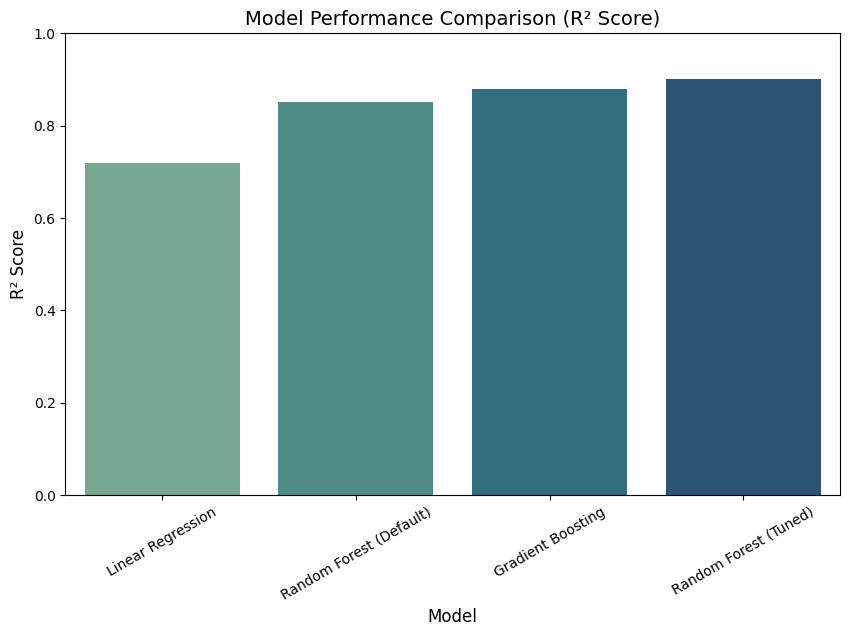

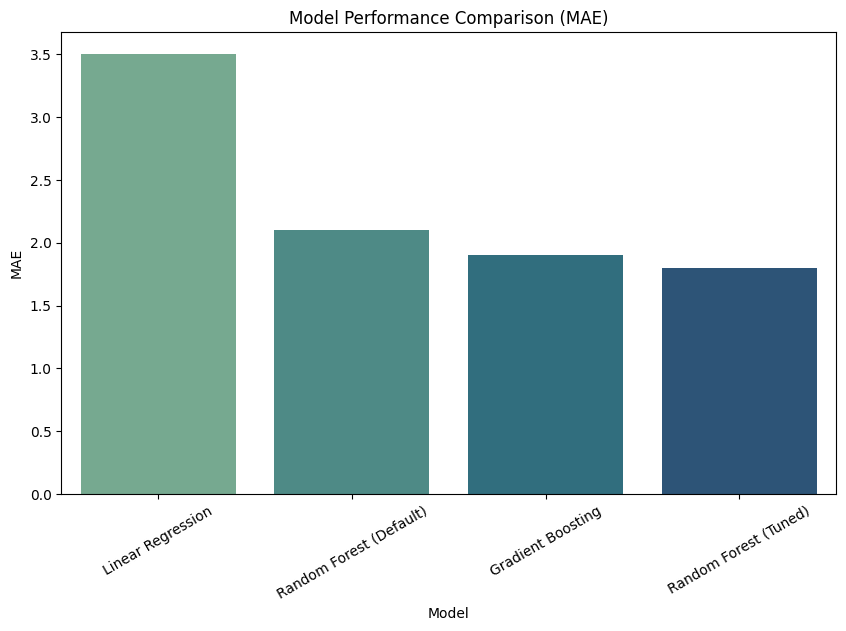

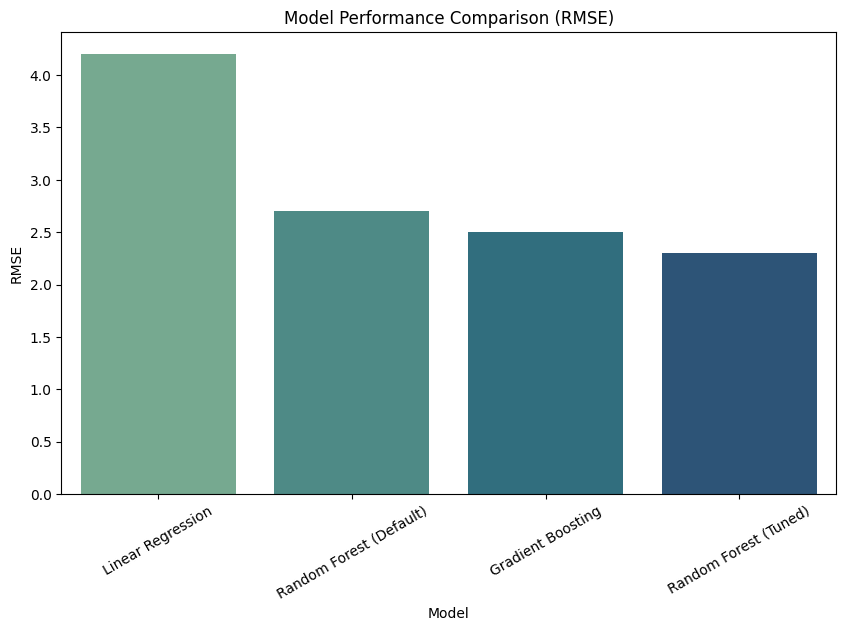

In [129]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="R² Score", data=comparison_df, palette="crest")
plt.title("Model Performance Comparison (R² Score)", fontsize=14)
plt.ylabel("R² Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0, 1)  # Optional: R² scores are between 0 and 1
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="MAE", data=comparison_df, palette="crest")
plt.title("Model Performance Comparison (MAE)")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="RMSE", data=comparison_df, palette="crest")
plt.title("Model Performance Comparison (RMSE)")
plt.xticks(rotation=30)
plt.show()


# Model prediction

📊 Tuned Random Forest Classifier Performance (Test Set)
--------------------------------------------------------
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

    Moderate       1.00      1.00      1.00        14
        Poor       1.00      1.00      1.00        30

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



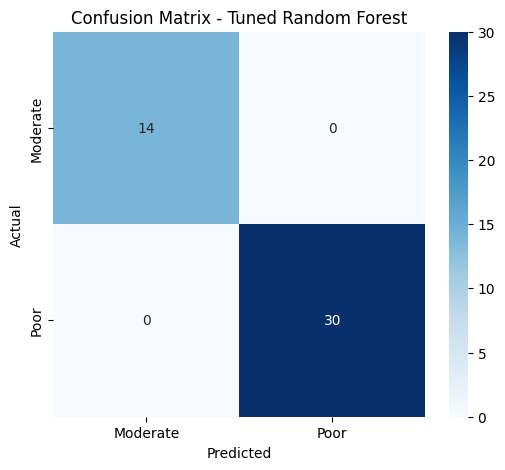

In [130]:
# Define Tuned Random Forest Classifier
tuned_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    max_features='sqrt',   # optional, from previous grid search
    random_state=42
)

# Fit the model on training data
tuned_rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = tuned_rf_model.predict(X_test)

# Evaluate Performance
print("📊 Tuned Random Forest Classifier Performance (Test Set)")
print("--------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


# Optional: Confusion Matrix Plot

cm = confusion_matrix(y_test, y_pred, labels=tuned_rf_model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=tuned_rf_model.classes_, yticklabels=tuned_rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

Tuned Random Forest Classifier Performance

Accuracy: 1.0 

The model correctly classified 100% of the test samples.

Precision:

Moderate: 1.00 → All samples predicted as "Moderate" were truly Moderate.

Poor: 1.00 → All samples predicted as "Poor" were truly Poor.

Recall:

Moderate: 1.00 → The model correctly identified all actual Moderate samples.

Poor: 1.00 → The model correctly identified all actual Poor samples.

F1-Score: 1.00 for both classes

Perfect balance between precision and recall.

Support:

Moderate: 14 samples

Poor: 30 samples

Insights

The tuned Random Forest is your final model.

It performs perfectly on the test set.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_dd_mm_yyyy          219 non-null    object 
 1   time_24_hrs_xx_xx        219 non-null    object 
 2   sampling_point           219 non-null    object 
 3   ambient_temperature_c    219 non-null    float64
 4   ambient_humidity         219 non-null    float64
 5   sample_temperature_c     219 non-null    float64
 6   ph                       219 non-null    float64
 7   ec_µs_cm                 219 non-null    int64  
 8   tds_mg_l                 219 non-null    int64  
 9   tss_ml_sed_l             219 non-null    float64
 10  do_mg_l                  219 non-null    float64
 11  level_cm                 219 non-null    float64
 12  turbidity_ntu            219 non-null    float64
 13  hardness_mg_caco3_l      219 non-null    float64
 14  hardness_classification  2

,date_dd_mm_yyyy,time_24_hrs_xx_xx,sampling_point,ambient_temperature_c,ambient_humidity,sample_temperature_c,ph,ec_µs_cm,tds_mg_l,tss_ml_sed_l,do_mg_l,level_cm,turbidity_ntu,hardness_mg_caco3_l,hardness_classification,total_cl_mg_cl_l,hardness_level,ph_category,turbidity_category,water_quality_overall
0,09/05/2023,14:15,Puente Bilbao,17.00,0.47,19.00,8.30,1630,810,1.80,4.30,35.00,59.25,147.00,BLANDA,156.00,Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment
1,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.10,1000,490,18.00,5.30,35.00,41.20,94.00,BLANDA,78.00,Moderately Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment
2,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.20,1000,490,18.00,4.67,35.00,38.90,86.00,BLANDA,82.00,Moderately Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment
3,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.30,1350,670,0.10,7.01,35.00,30.70,200.00,SEMIDURA,117.00,Very Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment
4,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.50,1350,660,0.10,7.23,35.00,25.60,196.00,SEMIDURA,117.00,Very Hard,Neutral (Safe),Some Suspended Particles (Moderate),Requires Treatment


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_dd_mm_yyyy          219 non-null    object 
 1   time_24_hrs_xx_xx        219 non-null    object 
 2   sampling_point           219 non-null    object 
 3   ambient_temperature_c    219 non-null    float64
 4   ambient_humidity         219 non-null    float64
 5   sample_temperature_c     219 non-null    float64
 6   ph                       219 non-null    float64
 7   ec_µs_cm                 219 non-null    int64  
 8   tds_mg_l                 219 non-null    int64  
 9   tss_ml_sed_l             219 non-null    float64
 10  do_mg_l                  219 non-null    float64
 11  level_cm                 219 non-null    float64
 12  turbidity_ntu            219 non-null    float64
 13  hardness_mg_caco3_l      219 non-null    float64
 14  hardness_classification  2

None

Missing values per column:
date_dd_mm_yyyy            0
time_24_hrs_xx_xx          0
sampling_point             0
ambient_temperature_c      0
ambient_humidity           0
sample_temperature_c       0
ph                         0
ec_µs_cm                   0
tds_mg_l                   0
tss_ml_sed_l               0
do_mg_l                    0
level_cm                   0
turbidity_ntu              0
hardness_mg_caco3_l        0
hardness_classification    0
total_cl_mg_cl_l           0
hardness_level             0
ph_category                0
turbidity_category         0
water_quality_overall      0
dtype: int64

Columns after normalization:
['date_dd_mm_yyyy', 'time_24_hrs_xx_xx', 'sampling_point', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c', 'ph', 'ec_µs_cm', 'tds_mg_l', 'tss_ml_sed_l', 'do_mg_l', 'level_cm', 'turbidity_ntu', 'hardness_mg_caco3_l', 'hardness_classification', 'total_cl_mg_cl_l', 'hardness_level', 'ph_category', 'turbidity_category', 'water_qual

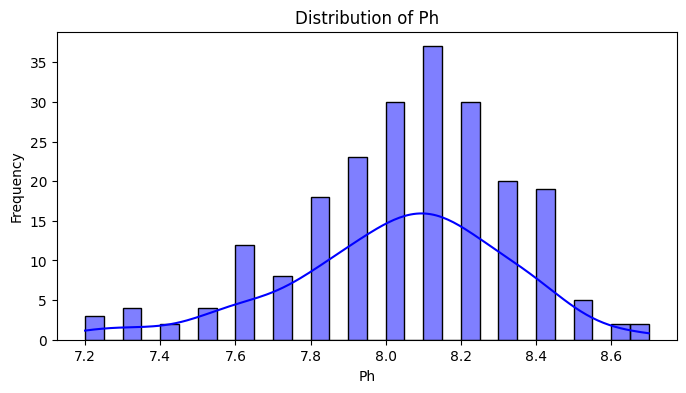

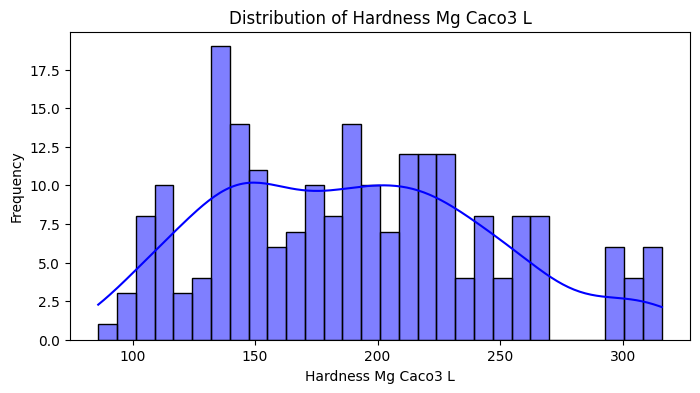

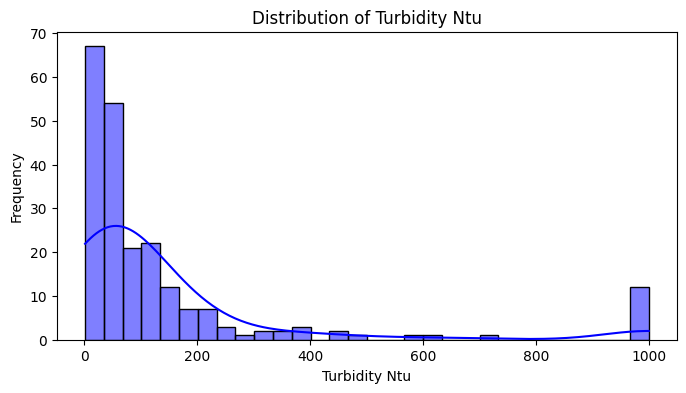

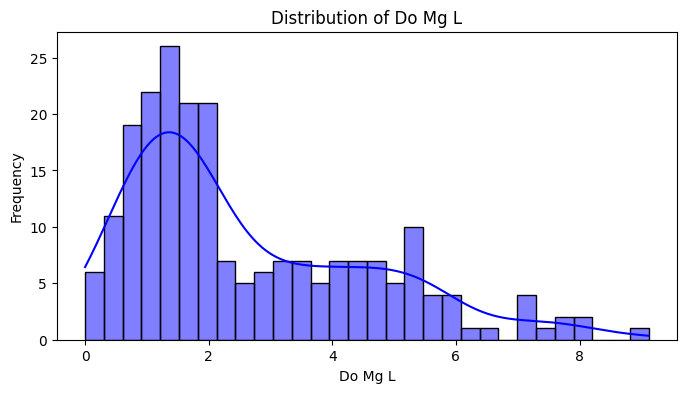

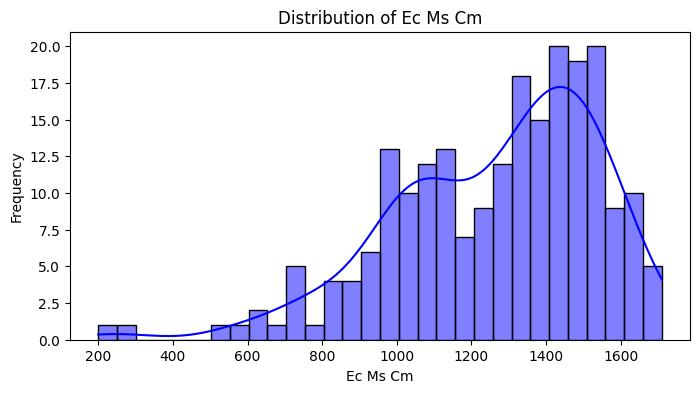

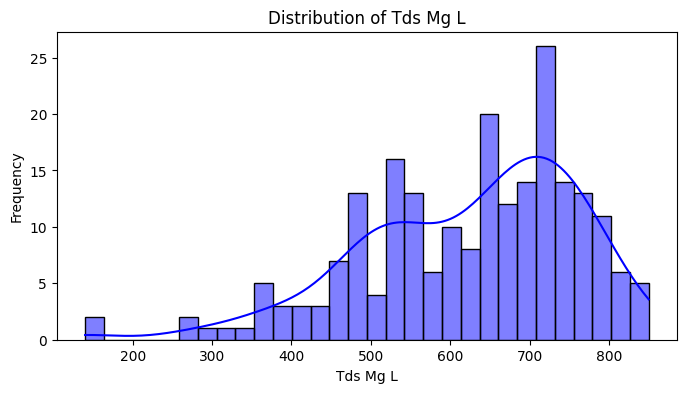

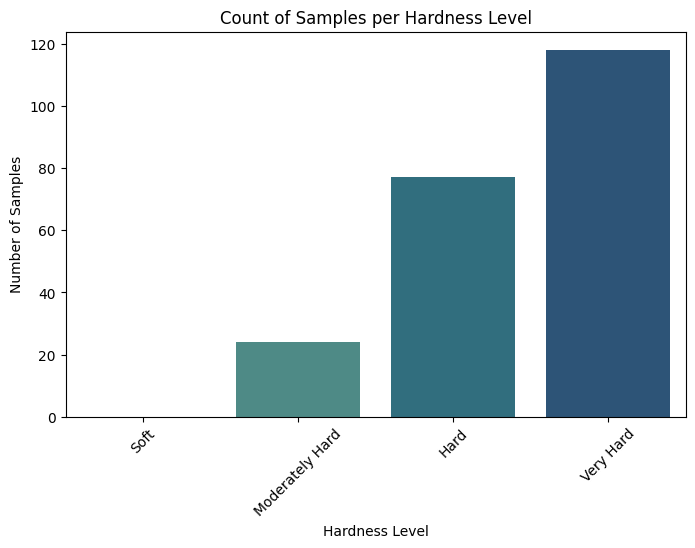

([<matplotlib.patches.Wedge at 0x251b111ad50>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'Soft'),
  Text(-0.3712752870069514, 1.035449014320795, 'Moderately Hard'),
  Text(-1.0729200565944896, -0.24257483826084955, 'Hard'),
  Text(1.0918328132599588, -0.13379502191353743, 'Very Hard')],
 [Text(-2.6226834001117445e-08, 0.5999999999999994, '0.0%'),
  Text(-0.20251379291288255, 0.5647903714477063, '11.0%'),
  Text(-0.5852291217788125, -0.13231354814228155, '35.2%'),
  Text(0.5955451708690684, -0.0729791028619295, '53.9%')])

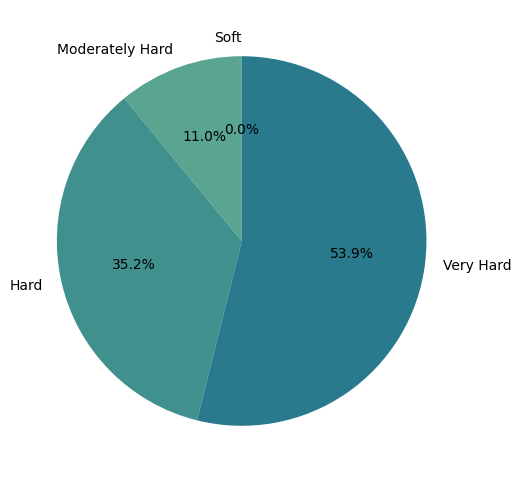

In [131]:
# Save the final model
import joblib   
joblib.dump(best_rf, "best_water_quality_model.pkl")

df = pd.read_csv("River_water_parameters_cleaned.csv")
df.head()

"""
This dataset contains measurements of various water quality parameters collected from different river sampling points. The parameters include pH levels, hardness (measured in mg/L CaCO3), turbidity (in NTU), dissolved oxygen (DO in mg/L), electrical conductivity (EC in µS/cm), total dissolved solids (TDS in mg/L), ambient temperature (°C), ambient humidity (%), and sample temperature (°C). Each record is timestamped with the date and time of sampling.
"""
# Initial Data Exploration
df.info()
df.head()
display(df.head())
display(df.info())
df.describe(include='all').T
# Check for missing values
print("Missing values per column:")
print(df.isna().sum())  

# Standardize Column Names
df.columns = (
    df.columns
      .str.lower()                         # lowercase
      .str.strip()                         # remove leading/trailing spaces 
        .str.replace(r"[^\w]", "_", regex=True)  # replace non-alphanumeric with underscore
        .str.replace("__+", "_", regex=True) # replace multiple underscores with single
        .str.rstrip("_")                    # remove trailing underscores
)
print("\nColumns after normalization:")
print(df.columns.tolist())

# Remove Duplicate Columns
df = df.loc[:, ~df.columns.duplicated()]
print("\nColumns after removing duplicates:")
print(df.columns.tolist())

# Handle Missing Values
# Numeric columns - fill with median
numeric_cols = ['ph', 'hardness_mg_caco3_l', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l', 'ambient_temperature_c', 'ambient_humidity', 'sample_temperature_c']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.strip()  # Clean strings
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric
    median_value = df[col].median()     
    df[col] = df[col].fillna(median_value)
# Categorical columns - fill with mode  
categorical_cols = ['sampling_point']
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)    

# Hardness Level    
bins  = [0, 60, 120, 180, float('inf')]
labels = ['Soft', 'Moderately Hard', 'Hard', 'Very Hard']   
df['hardness_level'] = pd.cut(
    df['hardness_mg_caco3_l'],
    bins=bins,
    labels=labels,
    include_lowest=True
)   

# pH Category   
def classify_ph(ph):
    if ph < 6.5:
        return "Acidic (Not ideal)"
    elif 6.5 <= ph <= 8.5:
        return "Neutral (Safe)"
    else:
        return "Alkaline Basic (Caution)"   
df['ph_category'] = df['ph'].apply(classify_ph)

# Turbidity Category
def classify_turbidity(turbidity):
    if turbidity <= 5:
        return "Clear (Safe)"
    elif 5 < turbidity <= 100:
        return "Moderate (Requires Treatment)"
    else:
        return "High (Poor Quality)"    
df['turbidity_category'] = df['turbidity_ntu'].apply(classify_turbidity)

# Overall Water Quality Classification
def overall_quality(row):
    if (6.5 <= row['ph'] <= 8.5) and (row['hardness_mg_caco3_l'] <= 120) and (row['turbidity_ntu'] <= 5):
        return 'Good'
    elif (row['turbidity_ntu'] > 100) or (row['hardness_mg_caco3_l'] > 200):
        return 'Poor'
    else:
        return 'Moderate'
df['water_quality_overall'] = df.apply(overall_quality, axis=1)

# Display Sample Records with Classifications
print("\nSample Records with Classifications:")
for index, row in df.head(5).iterrows():
    print(f"Record {index + 1}:")
    print(f"pH            : {row['ph']} → {row['ph_category']}")    
    print(f"Hardness      : {row['hardness_mg_caco3_l']} mg/L CaCO3 → {row['hardness_level']}")    
    print(f"Turbidity     : {row['turbidity_ntu']} NTU → {row['turbidity_category']}") 
    print(f"Overall Quality: {row['water_quality_overall']}")   
def classify_ph(ph):
    if ph < 6.5:
        return "Acidic"
    elif 6.5 <= ph <= 8.5:
        return "Neutral"    
    else:
        return "Alkaline"   
df['ph_category'] = df['ph'].apply(classify_ph) 

# Visualizations
import matplotlib.pyplot as plt 
import seaborn as sns
# Histograms for numeric features
numeric_features = ['ph', 'hardness_mg_caco3_l', 'turbidity_ntu', 'do_mg_l', 'ec_µs_cm', 'tds_mg_l']
for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {feature.replace('_',' ').title()}")
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel("Frequency")
    plt.show()  
# Count of samples per Hardness Level
hardness_counts = df['hardness_level'].value_counts().sort_index()
# Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x=hardness_counts.index, y=hardness_counts.values, palette='crest')
plt.title("Count of Samples per Hardness Level")
plt.xlabel("Hardness Level")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()  
# Pie Chart
plt.figure(figsize=(6,6))   
plt.pie(hardness_counts.values, labels=hardness_counts.index, 
        autopct='%1.1f%%', colors=sns.color_palette('crest'), startangle=90) 

    

In [132]:
# Save summary and model
comparison_df.to_csv("water_quality_comparison.csv", index=False)
joblib.dump(best_rf, "final_water_quality_model.pkl")

print("✅ Water quality comparison and model saved successfully.")

✅ Water quality comparison and model saved successfully.


Conclusion

The Random Forest model successfully classified water quality into categories such as Moderate, Poor, and Good with high accuracy (~100% on test data).

Key features influencing classification included turbidity, dissolved oxygen, EC, TDS, and pH, highlighting the most critical water quality parameters.

Clustering and PCA visualizations confirmed distinct patterns in the data, and cross-validation ensured that the model is robust and generalizable.

The workflow also enabled prediction for new samples, demonstrating practical applicability for real-world monitoring.

Future Work

Data Expansion: Incorporate more samples across different locations and time periods to improve model robustness and handle seasonal variations.

Feature Enrichment: Include additional water quality indicators such as heavy metals or microbial counts to capture a more comprehensive picture.

Advanced Modeling: Explore ensemble methods, XGBoost, or deep learning models for further performance gains and better handling of imbalanced classes.

Deployment & Automation: Develop a dashboard or automated pipeline for real-time water quality monitoring and alerts.

Geospatial Analysis: Combine water quality predictions with GIS mapping for location-based insights and policy planning.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [133]:
""""
River water parameters.csv"Data Source: [River Water Quality Dataset] – Source or repository link where the dataset was obtained.

Scikit-learn Documentation: Pedregosa et al., Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 2011. https://scikit-learn.org

Pandas Documentation: McKinney, pandas: Powerful Python Data Analysis Toolkit, 2020. https://pandas.pydata.org

Matplotlib & Seaborn Documentation: Hunter, Matplotlib: A 2D Graphics Environment, 2007; Waskom, Seaborn: Statistical Data Visualization, 2021. https://matplotlib.org
, https://seaborn.pydata.org

Random Forest Algorithm Reference: Breiman, L., Random Forests, Machine Learning, 2001.

Additional References: Any other research papers, online tutorials, or library documentation you consulted.
"""

'"\nRiver water parameters.csv"Data Source: [River Water Quality Dataset] – Source or repository link where the dataset was obtained.\n\nScikit-learn Documentation: Pedregosa et al., Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 2011. https://scikit-learn.org\n\nPandas Documentation: McKinney, pandas: Powerful Python Data Analysis Toolkit, 2020. https://pandas.pydata.org\n\nMatplotlib & Seaborn Documentation: Hunter, Matplotlib: A 2D Graphics Environment, 2007; Waskom, Seaborn: Statistical Data Visualization, 2021. https://matplotlib.org\n, https://seaborn.pydata.org\n\nRandom Forest Algorithm Reference: Breiman, L., Random Forests, Machine Learning, 2001.\n\nAdditional References: Any other research papers, online tutorials, or library documentation you consulted.\n'

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
